In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 한글 폰트 이슈 해결하기 - 로컬
import os
import matplotlib.pyplot as plt

# mac
if os.name == "posix":
	plt.rc("font", family="AppleGothic")

In [2]:
df = pd.read_csv("data/shopping_trends_updated_new_column.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Item Purchased_new,Age_group,location_new
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,tops,50s,South
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Express,Yes,Yes,2,Cash,Fortnightly,tops,10-20s,Northeast
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,bottoms,50s,Northeast
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,shoes,10-20s,Northeast
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,tops,40s,West


In [3]:
df_cus = pd.read_csv("data/shopping_trends_updated_new_customer.csv")
df_cus.drop('Unnamed: 0', axis=1, inplace=True)
df_cus.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Frequency of Purchases,Item Purchased_new,Age_group,location_new,Previous Purchases Score,Frequency Purchases Score,Total_Amount,Total_Purchases_Amount_Score,Total Score,Customer Type
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Fortnightly,tops,50s,South,2,4,795,2,8,Regural Customer
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Fortnightly,tops,10-20s,Northeast,1,4,192,1,6,New Customer
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Weekly,bottoms,50s,Northeast,3,5,1752,4,12,Regural Customer
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Weekly,shoes,10-20s,Northeast,5,5,4500,5,15,Loyal Customer
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Annually,tops,40s,West,4,1,1568,3,8,Regural Customer


In [4]:
df_cus['Customer Type'].value_counts()

Customer Type
Regural Customer     2685
Loyal Customer        505
Light Customer        412
New Customer          244
InActive Customer      54
Name: count, dtype: int64

In [5]:
import pandas as pd

# 'Customer Type'이 'Loyal Customer'인 행만 필터링
loyal_customers = df_cus[df_cus['Customer Type'] == 'Loyal Customer']

# 'Age_group'을 기준으로 그룹화
grouped_df = loyal_customers.groupby('Age_group')['Item Purchased_new'].value_counts().reset_index(name='Count')
print(grouped_df)


   Age_group Item Purchased_new  Count
0     10-20s            bottoms     22
1     10-20s               tops     21
2     10-20s           wear_acc     18
3     10-20s              shoes     18
4     10-20s             outers     10
5     10-20s               bags      9
6     10-20s        accessories      9
7        30s               tops     23
8        30s            bottoms     17
9        30s              shoes     16
10       30s           wear_acc     13
11       30s        accessories      7
12       30s             outers      6
13       30s               bags      6
14       40s            bottoms     19
15       40s               tops     15
16       40s           wear_acc     13
17       40s             outers     11
18       40s        accessories     10
19       40s              shoes      7
20       40s               bags      7
21       50s              shoes     23
22       50s            bottoms     21
23       50s               tops     21
24       50s        acces

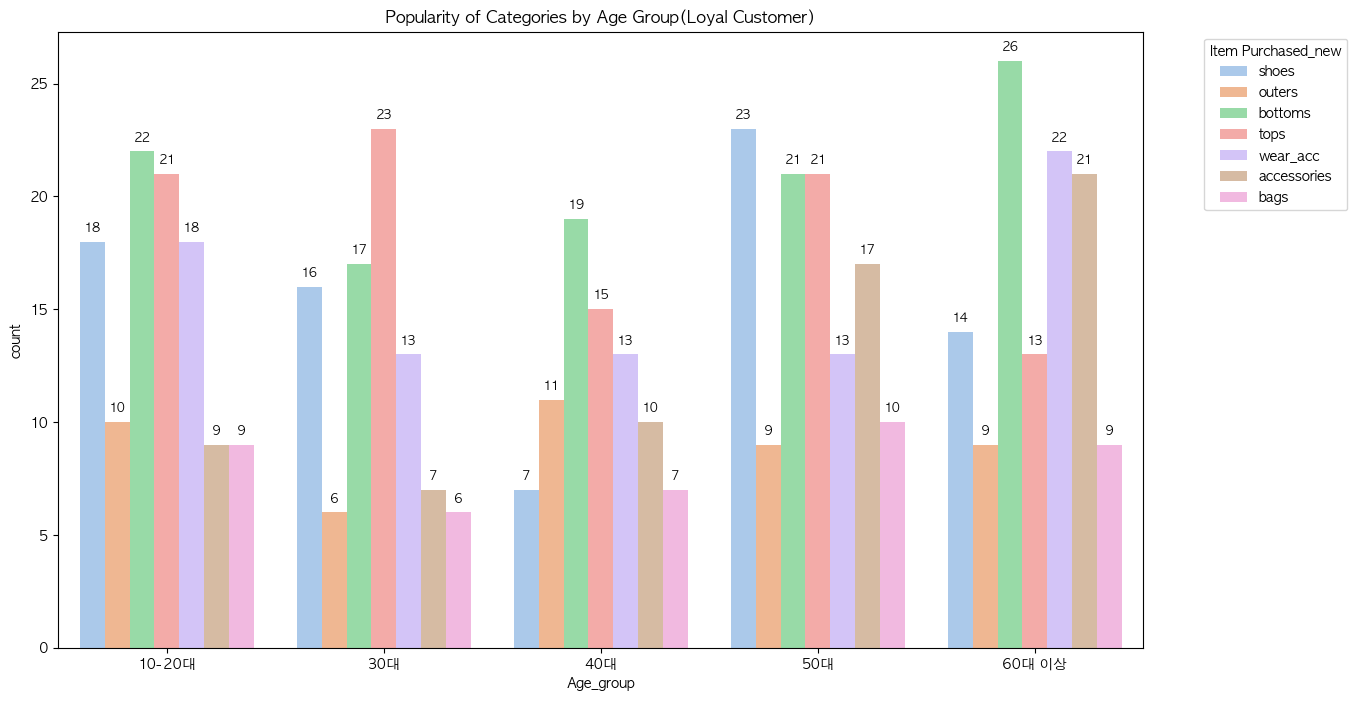

In [6]:
## 연령대에 따른 아이템 구매 현황

plt.figure(figsize=(14, 8))
age_order = ['10-20s', '30s', '40s', '50s', '60s+']
ax = sns.countplot(data=df_cus[df_cus['Customer Type'] == 'Loyal Customer'], x='Age_group', hue='Item Purchased_new', 
              palette='pastel', order=age_order)
age = ['10-20대', '30대', '40대', '50대', '60대 이상']  # age 순서 변경
plt.xticks(range(len(age)), age, rotation=0)  # 라벨 가로로 표시
plt.title('Popularity of Categories by Age Group(Loyal Customer)')
plt.legend(title='Item Purchased_new', bbox_to_anchor=(1.05, 1), loc='upper left')


for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 10),
                textcoords='offset points')


plt.show()


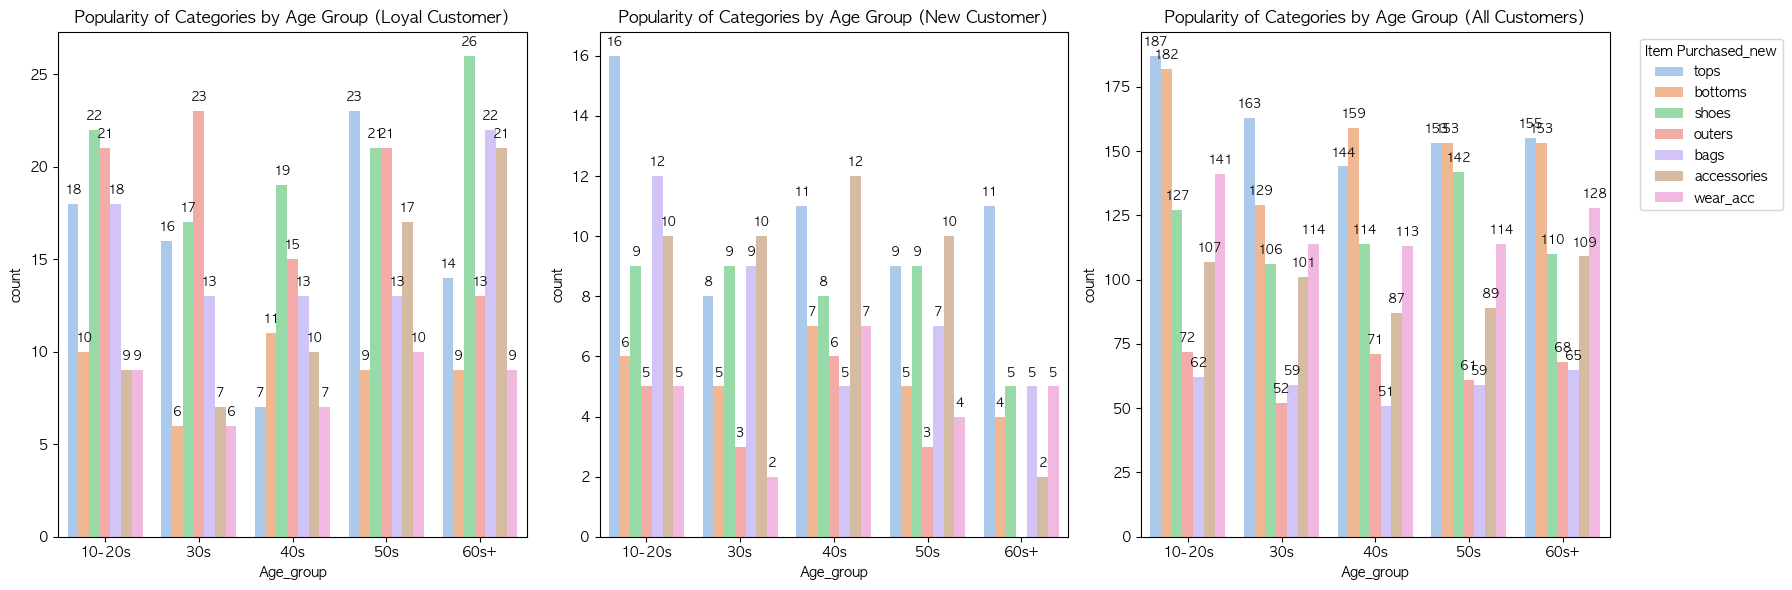

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))

# Loyal Customer에 대한 그래프
plt.subplot(1, 3, 1)
ax1 = sns.countplot(data=df_cus[df_cus['Customer Type'] == 'Loyal Customer'], x='Age_group', hue='Item Purchased_new', 
                    palette='pastel', order=age_order)
plt.title('Popularity of Categories by Age Group (Loyal Customer)')
plt.legend().remove()

# New Customer에 대한 그래프
plt.subplot(1, 3, 2)
ax2 = sns.countplot(data=df_cus[df_cus['Customer Type'] == 'New Customer'], x='Age_group', hue='Item Purchased_new', 
                    palette='pastel', order=age_order)
plt.title('Popularity of Categories by Age Group (New Customer)')
plt.legend().remove()

# 모든 고객에 대한 그래프
plt.subplot(1, 3, 3)
ax3 = sns.countplot(data=df_cus, x='Age_group', hue='Item Purchased_new', 
                    palette='pastel', order=age_order)
plt.title('Popularity of Categories by Age Group (All Customers)')
plt.legend(title='Item Purchased_new', bbox_to_anchor=(1.05, 1), loc='upper left')

# 각 subplot에 대한 annotation을 추가
for ax in [ax1, ax2, ax3]:
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', fontsize=9, color='black', xytext=(0, 10),
                        textcoords='offset points')

# subplot 간의 간격 조정
plt.tight_layout()

plt.show()


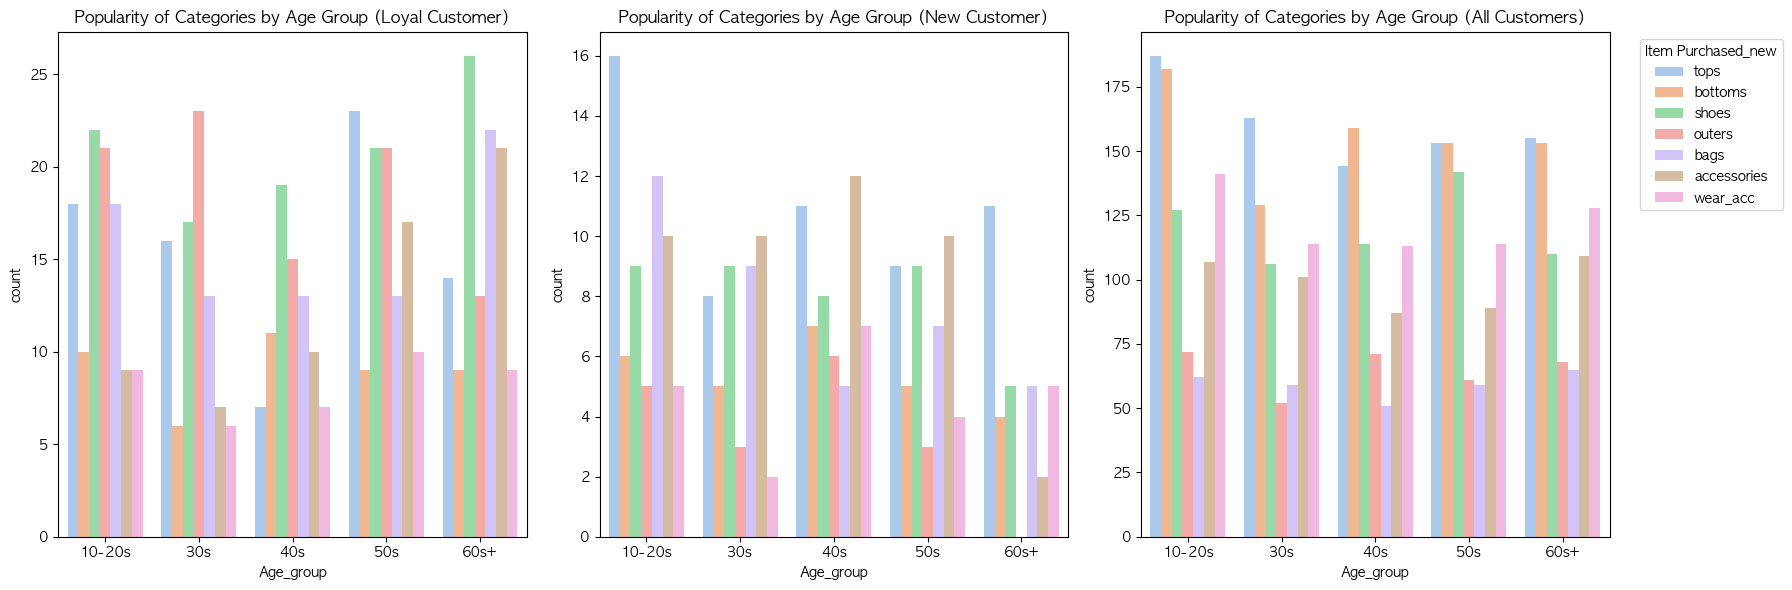

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))

# Loyal Customer에 대한 그래프
plt.subplot(1, 3, 1)
ax1 = sns.countplot(data=df_cus[df_cus['Customer Type'] == 'Loyal Customer'], x='Age_group', hue='Item Purchased_new', 
                    palette='pastel', order=age_order)
plt.title('Popularity of Categories by Age Group (Loyal Customer)')
plt.legend().remove()

# New Customer에 대한 그래프
plt.subplot(1, 3, 2)
ax2 = sns.countplot(data=df_cus[df_cus['Customer Type'] == 'New Customer'], x='Age_group', hue='Item Purchased_new', 
                    palette='pastel', order=age_order)
plt.title('Popularity of Categories by Age Group (New Customer)')
plt.legend().remove()

# 모든 고객에 대한 그래프
plt.subplot(1, 3, 3)
ax3 = sns.countplot(data=df_cus, x='Age_group', hue='Item Purchased_new', 
                    palette='pastel', order=age_order)
plt.title('Popularity of Categories by Age Group (All Customers)')
plt.legend(title='Item Purchased_new', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()


전체 집단과 비교했을 때, 

- 충성고객
    - 다른 집단에 비해 전반적으로 아우터와 신발 구매가 많다. 
    - 60대 이상의 신발 구매가 많이 이루어진다.

- 신규고객
    - 전반적인 영역에서 착용 악세서리(스카프, 모자, 장갑, 양말)의 구매가 적다. 

In [9]:
df_10_20s = df_cus[df_cus['Age_group'] == '10-20s']
df_30s = df_cus[df_cus['Age_group'] == '30s']
df_40s = df_cus[df_cus['Age_group'] == '40s']
df_50s = df_cus[df_cus['Age_group'] == '50s']
df_60s = df_cus[df_cus['Age_group'] == '60s+']

In [10]:
# 상위 10개 아이템 카테고리의 인덱스
df_10_20s['Item Purchased'].value_counts().head(10)

Item Purchased
Coat        44
Shirt       44
Skirt       44
Sweater     42
Belt        41
Sneakers    38
Shorts      38
Dress       38
Pants       37
Blouse      36
Name: count, dtype: int64

In [11]:
df_10_20s[df_10_20s['Customer Type'] == 'Loyal Customer']['Item Purchased'].value_counts().head(10)

Item Purchased
Skirt       9
Coat        8
Shirt       7
Gloves      6
Shorts      6
Scarf       6
Boots       6
Dress       6
Hat         6
Backpack    5
Name: count, dtype: int64

In [12]:
df_10_20s[df_10_20s['Customer Type'] == 'New Customer']['Item Purchased'].value_counts().head(10)

Item Purchased
Shoes      5
Sweater    4
Shirt      4
Jacket     4
Gloves     4
Skirt      4
Blouse     3
Handbag    3
Belt       3
T-shirt    3
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


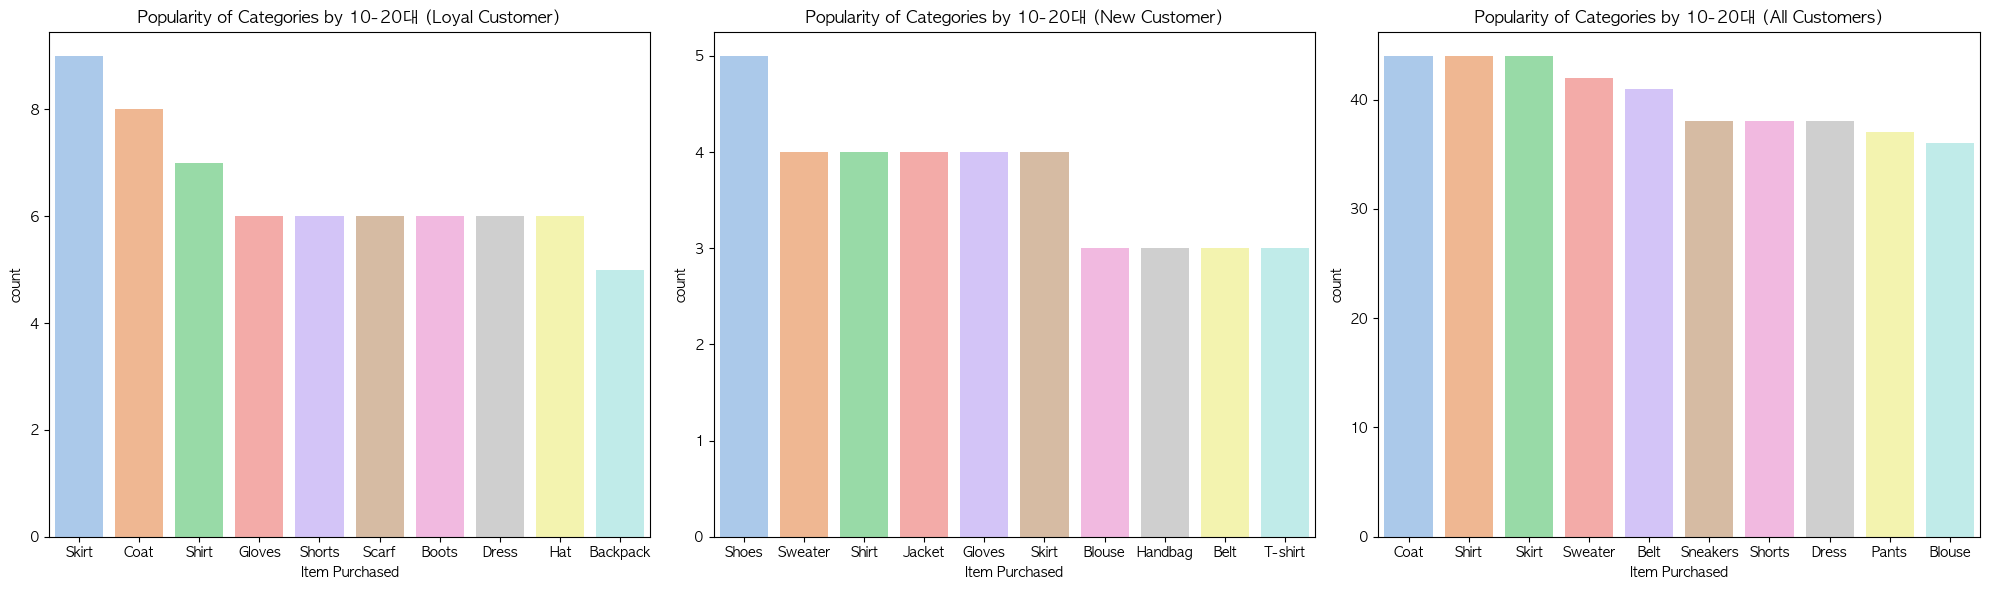

In [13]:
plt.figure(figsize=(20, 6))

# Loyal Customer에 대한 그래프
plt.subplot(1, 3, 1)
top_items1 = df_10_20s[df_10_20s['Customer Type'] == 'Loyal Customer']['Item Purchased'].value_counts().index[:10]
ax1 = sns.countplot(data=df_10_20s[df_10_20s['Customer Type'] == 'Loyal Customer'], x='Item Purchased', 
                    palette='pastel', order=top_items1)
plt.title('Popularity of Categories by 10-20대 (Loyal Customer)')
plt.legend().remove()

# New Customer에 대한 그래프
plt.subplot(1, 3, 2)
top_items2 = df_10_20s[df_10_20s['Customer Type'] == 'New Customer']['Item Purchased'].value_counts().index[:10]
ax2 = sns.countplot(data=df_10_20s[df_10_20s['Customer Type'] == 'New Customer'], x='Item Purchased', 
                    palette='pastel', order=top_items2)
plt.title('Popularity of Categories by 10-20대 (New Customer)')
plt.legend().remove()

# 모든 고객에 대한 그래프
plt.subplot(1, 3, 3)
top_items3 = df_10_20s['Item Purchased'].value_counts().index[:10]
ax3 = sns.countplot(data=df_10_20s, x='Item Purchased',
                    palette='pastel', order=top_items3)
plt.title('Popularity of Categories by 10-20대 (All Customers)')
plt.legend().remove()

plt.tight_layout()
plt.show()

각 그룹별 y축 범위는 다르지만, 10-20대에서 각 그룹별 선호하는 물품을 확인할 수 있음
- 충성고객의 경우 치마, 코트, 셔츠를 많이 구매
- 신규고객의 경우 신발을 많이 구매함

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


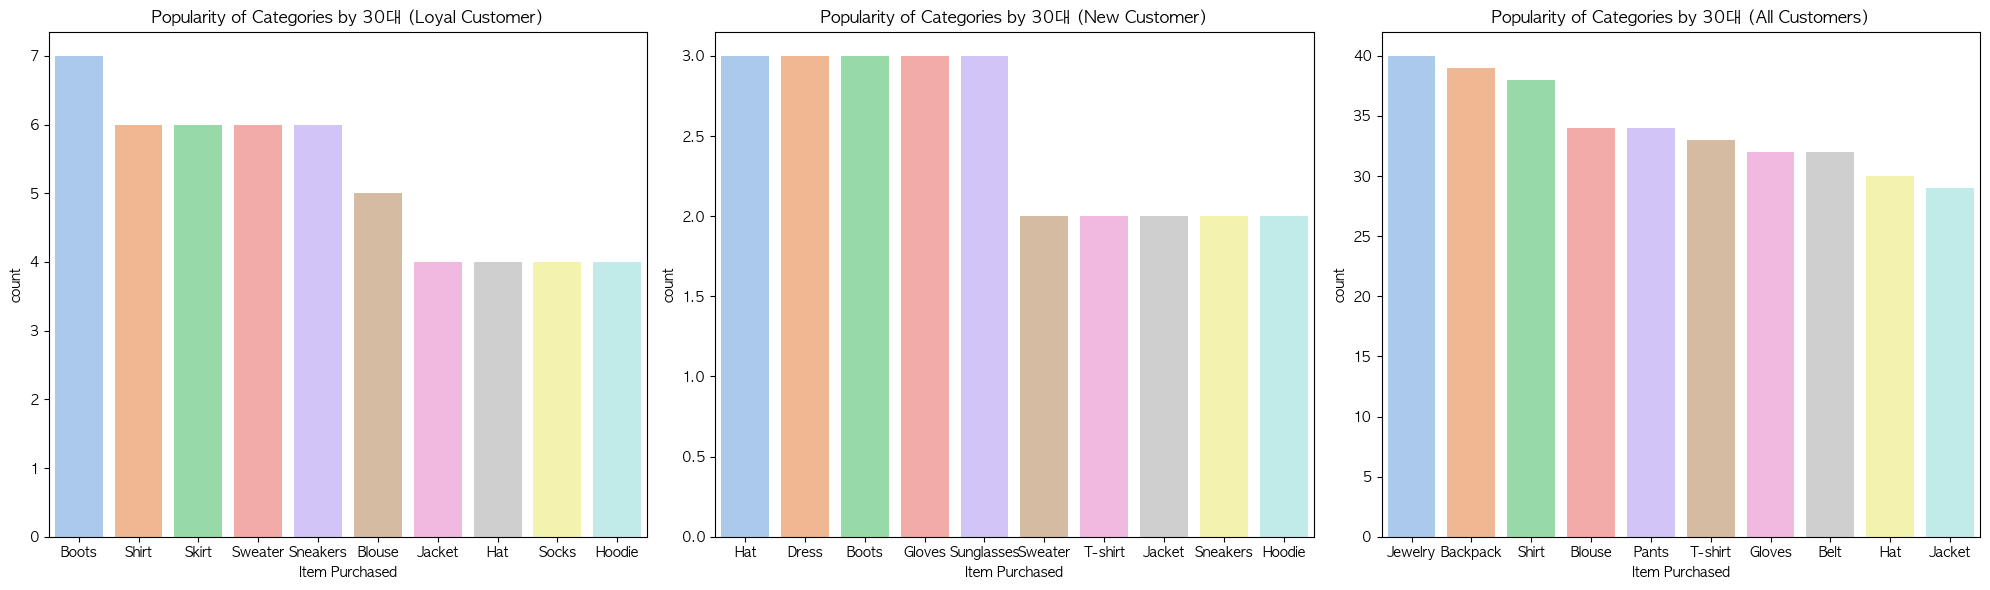

In [14]:
plt.figure(figsize=(20, 6))

# Loyal Customer에 대한 그래프
plt.subplot(1, 3, 1)
top_items1 = df_30s[df_30s['Customer Type'] == 'Loyal Customer']['Item Purchased'].value_counts().index[:10]
ax1 = sns.countplot(data=df_30s[df_30s['Customer Type'] == 'Loyal Customer'], x='Item Purchased', 
                    palette='pastel', order=top_items1)
plt.title('Popularity of Categories by 30대 (Loyal Customer)')
plt.legend().remove()

# New Customer에 대한 그래프
plt.subplot(1, 3, 2)
top_items2 = df_30s[df_30s['Customer Type'] == 'New Customer']['Item Purchased'].value_counts().index[:10]
ax2 = sns.countplot(data=df_30s[df_30s['Customer Type'] == 'New Customer'], x='Item Purchased', 
                    palette='pastel', order=top_items2)
plt.title('Popularity of Categories by 30대 (New Customer)')
plt.legend().remove()

# 모든 고객에 대한 그래프
plt.subplot(1, 3, 3)
top_items3 = df_30s['Item Purchased'].value_counts().index[:10]
ax3 = sns.countplot(data=df_30s, x='Item Purchased',
                    palette='pastel', order=top_items3)
plt.title('Popularity of Categories by 30대 (All Customers)')
plt.legend().remove()

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


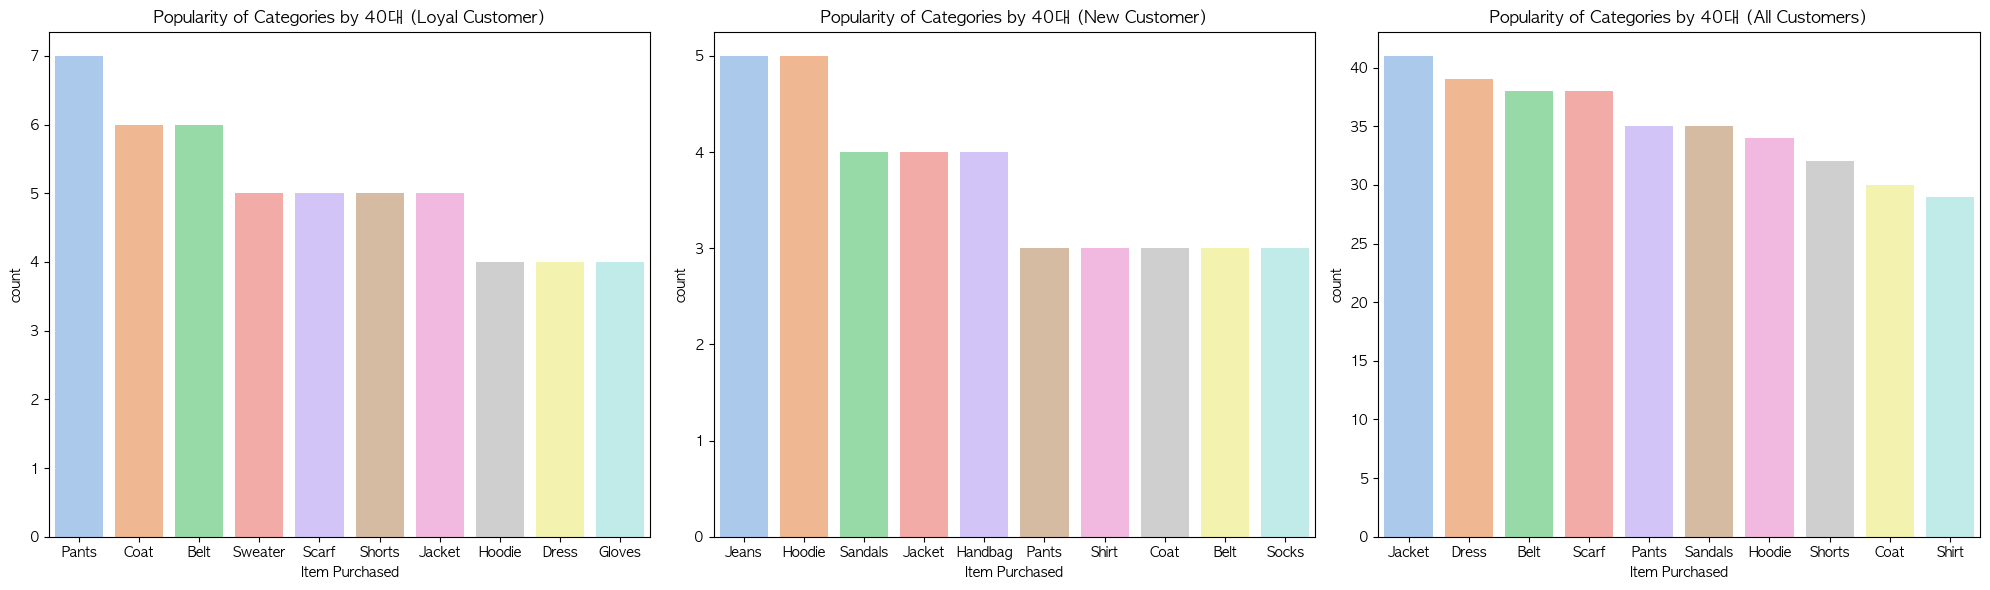

In [15]:
plt.figure(figsize=(20, 6))

# Loyal Customer에 대한 그래프
plt.subplot(1, 3, 1)
top_items1 = df_40s[df_40s['Customer Type'] == 'Loyal Customer']['Item Purchased'].value_counts().index[:10]
ax1 = sns.countplot(data=df_40s[df_40s['Customer Type'] == 'Loyal Customer'], x='Item Purchased', 
                    palette='pastel', order=top_items1)
plt.title('Popularity of Categories by 40대 (Loyal Customer)')
plt.legend().remove()

# New Customer에 대한 그래프
plt.subplot(1, 3, 2)
top_items2 = df_40s[df_40s['Customer Type'] == 'New Customer']['Item Purchased'].value_counts().index[:10]
ax2 = sns.countplot(data=df_40s[df_40s['Customer Type'] == 'New Customer'], x='Item Purchased', 
                    palette='pastel', order=top_items2)
plt.title('Popularity of Categories by 40대 (New Customer)')
plt.legend().remove()

# 모든 고객에 대한 그래프
plt.subplot(1, 3, 3)
top_items3 = df_40s['Item Purchased'].value_counts().index[:10]
ax3 = sns.countplot(data=df_40s, x='Item Purchased',
                    palette='pastel', order=top_items3)
plt.title('Popularity of Categories by 40대 (All Customers)')
plt.legend().remove()

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


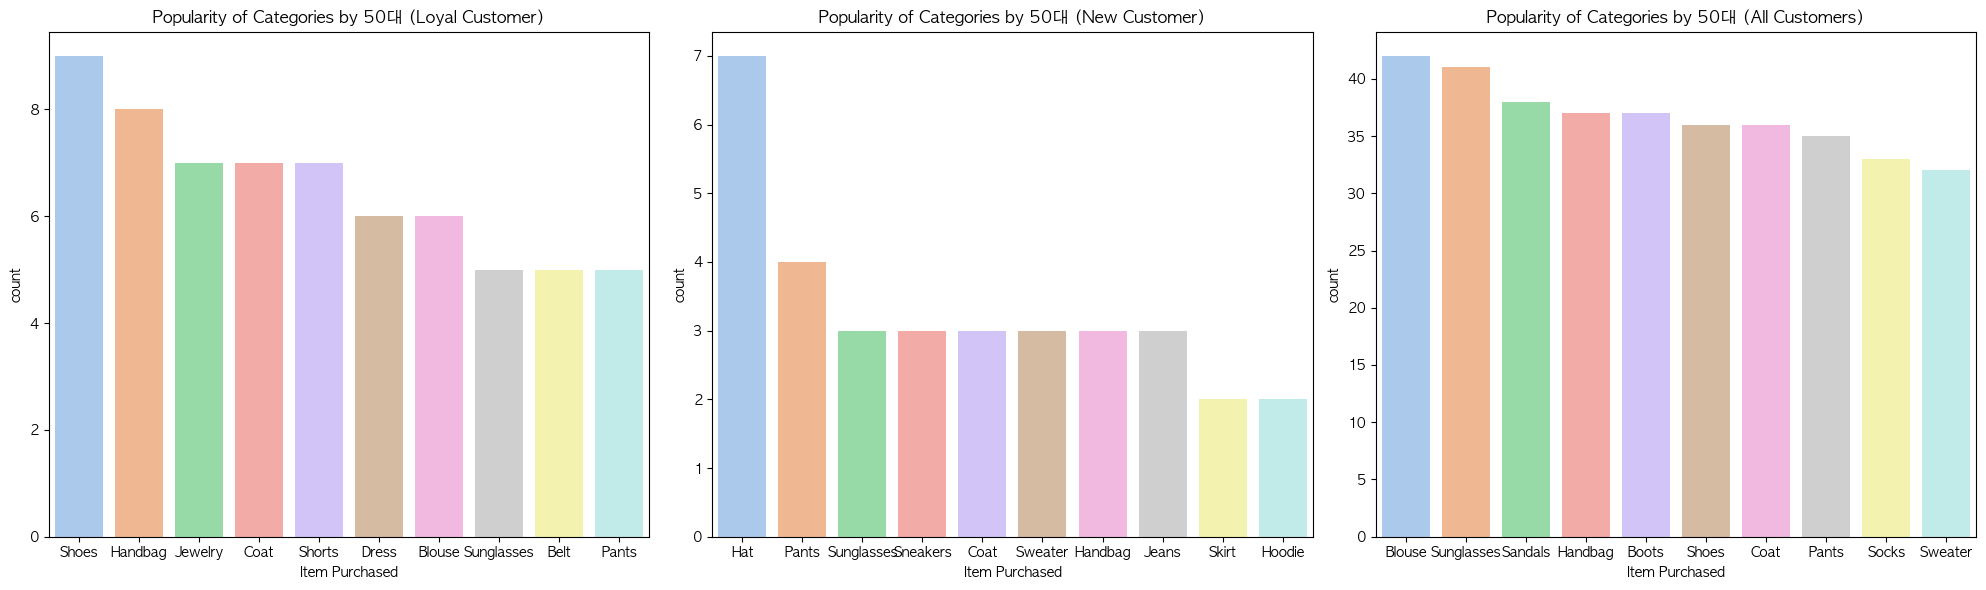

In [16]:
plt.figure(figsize=(20, 6))

# Loyal Customer에 대한 그래프
plt.subplot(1, 3, 1)
top_items1 = df_50s[df_50s['Customer Type'] == 'Loyal Customer']['Item Purchased'].value_counts().index[:10]
ax1 = sns.countplot(data=df_50s[df_50s['Customer Type'] == 'Loyal Customer'], x='Item Purchased', 
                    palette='pastel', order=top_items1)
plt.title('Popularity of Categories by 50대 (Loyal Customer)')
plt.legend().remove()

# New Customer에 대한 그래프
plt.subplot(1, 3, 2)
top_items2 = df_50s[df_50s['Customer Type'] == 'New Customer']['Item Purchased'].value_counts().index[:10]
ax2 = sns.countplot(data=df_50s[df_50s['Customer Type'] == 'New Customer'], x='Item Purchased', 
                    palette='pastel', order=top_items2)
plt.title('Popularity of Categories by 50대 (New Customer)')
plt.legend().remove()

# 모든 고객에 대한 그래프
plt.subplot(1, 3, 3)
top_items3 = df_50s['Item Purchased'].value_counts().index[:10]
ax3 = sns.countplot(data=df_50s, x='Item Purchased',
                    palette='pastel', order=top_items3)
plt.title('Popularity of Categories by 50대 (All Customers)')
plt.legend().remove()


plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


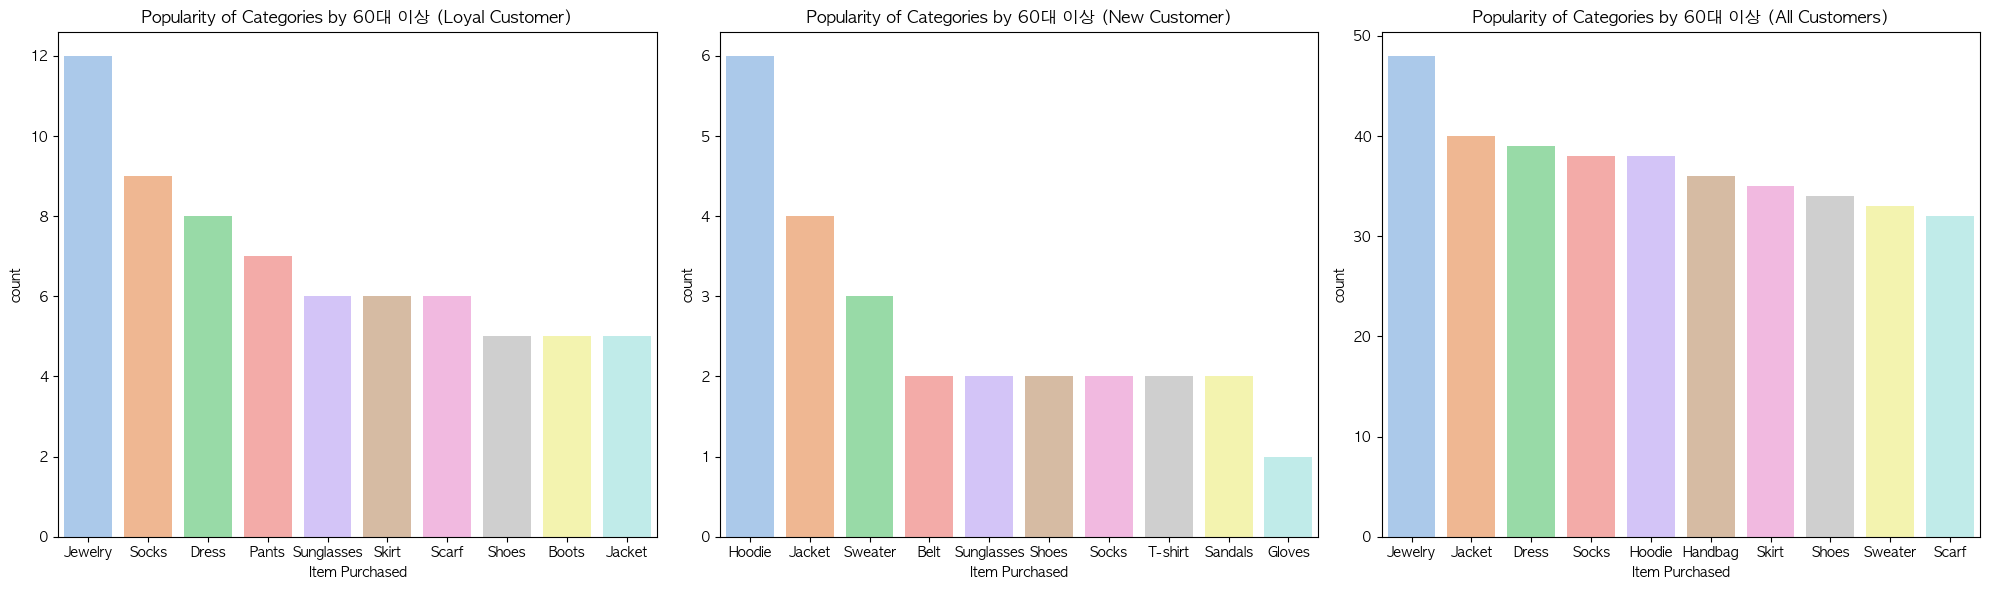

In [17]:
plt.figure(figsize=(20, 6))

# Loyal Customer에 대한 그래프
plt.subplot(1, 3, 1)
top_items1 = df_60s[df_60s['Customer Type'] == 'Loyal Customer']['Item Purchased'].value_counts().index[:10]
ax1 = sns.countplot(data=df_60s[df_60s['Customer Type'] == 'Loyal Customer'], x='Item Purchased', 
                    palette='pastel', order=top_items1)
plt.title('Popularity of Categories by 60대 이상 (Loyal Customer)')
plt.legend().remove()

# New Customer에 대한 그래프
plt.subplot(1, 3, 2)
top_items2 = df_60s[df_60s['Customer Type'] == 'New Customer']['Item Purchased'].value_counts().index[:10]
ax2 = sns.countplot(data=df_60s[df_60s['Customer Type'] == 'New Customer'], x='Item Purchased', 
                    palette='pastel', order=top_items2)
plt.title('Popularity of Categories by 60대 이상 (New Customer)')
plt.legend().remove()

# 모든 고객에 대한 그래프
plt.subplot(1, 3, 3)
top_items3 = df_60s['Item Purchased'].value_counts().index[:10]
ax3 = sns.countplot(data=df_60s, x='Item Purchased',
                    palette='pastel', order=top_items3)
plt.title('Popularity of Categories by 60대 이상 (All Customers)')
plt.legend().remove()


plt.tight_layout()
plt.show()

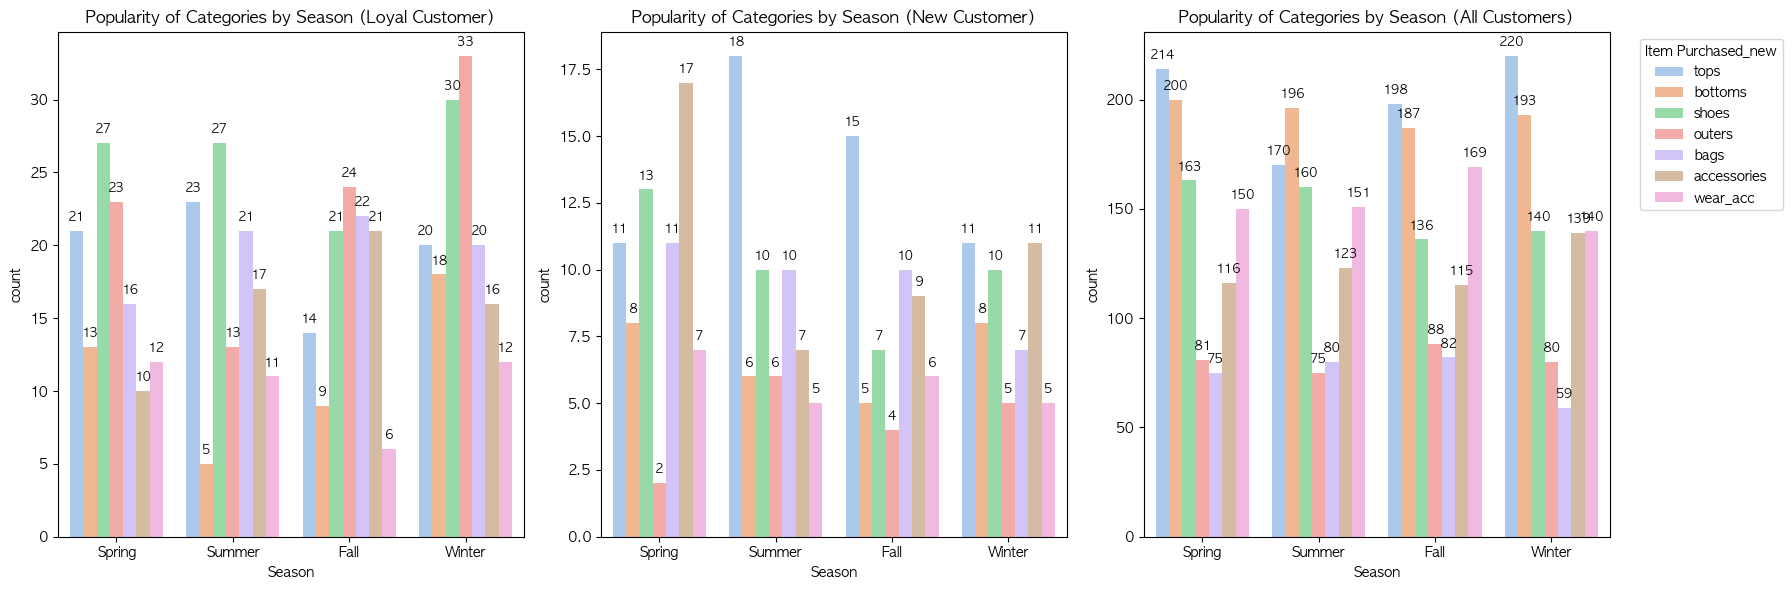

In [18]:
# 그래프를 그릴 전체 figure 크기를 설정합니다.
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
plt.figure(figsize=(18, 6))

# Loyal Customer에 대한 그래프
plt.subplot(1, 3, 1)
ax1 = sns.countplot(data=df_cus[df_cus['Customer Type'] == 'Loyal Customer'], x='Season', hue='Item Purchased_new', 
                    palette='pastel', order=season_order)
plt.title('Popularity of Categories by Season (Loyal Customer)')
plt.legend().remove()

# New Customer에 대한 그래프
plt.subplot(1, 3, 2)
ax2 = sns.countplot(data=df_cus[df_cus['Customer Type'] == 'New Customer'], x='Season', hue='Item Purchased_new', 
                    palette='pastel', order=season_order)
plt.title('Popularity of Categories by Season (New Customer)')
plt.legend().remove()

# 모든 고객에 대한 그래프
plt.subplot(1, 3, 3)
ax3 = sns.countplot(data=df_cus, x='Season', hue='Item Purchased_new', 
                    palette='pastel', order=season_order)
plt.title('Popularity of Categories by Season (All Customers)')
plt.legend(title='Item Purchased_new', bbox_to_anchor=(1.05, 1), loc='upper left')

# 각 subplot에 대한 annotation 추가
for ax in [ax1, ax2, ax3]:
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', fontsize=9, color='black', xytext=(0, 10),
                        textcoords='offset points')

plt.tight_layout()
plt.show()






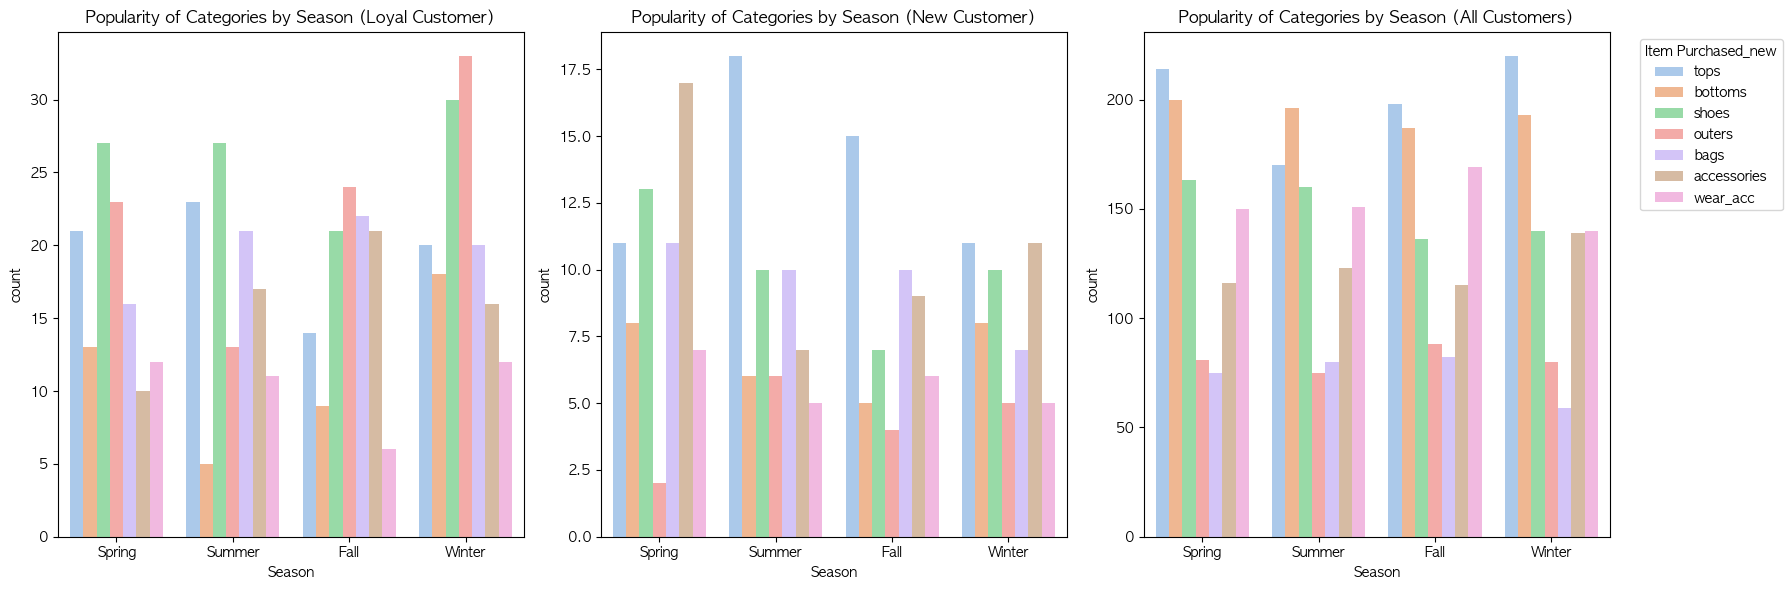

In [19]:

season_order = ['Spring', 'Summer', 'Fall', 'Winter']
plt.figure(figsize=(18, 6))

# Loyal Customer에 대한 그래프
plt.subplot(1, 3, 1)
ax1 = sns.countplot(data=df_cus[df_cus['Customer Type'] == 'Loyal Customer'], x='Season', hue='Item Purchased_new', 
                    palette='pastel', order=season_order)
plt.title('Popularity of Categories by Season (Loyal Customer)')
plt.legend().remove()

# New Customer에 대한 그래프
plt.subplot(1, 3, 2)
ax2 = sns.countplot(data=df_cus[df_cus['Customer Type'] == 'New Customer'], x='Season', hue='Item Purchased_new', 
                    palette='pastel', order=season_order)
plt.title('Popularity of Categories by Season (New Customer)')
plt.legend().remove()

# 모든 고객에 대한 그래프
plt.subplot(1, 3, 3)
ax3 = sns.countplot(data=df_cus, x='Season', hue='Item Purchased_new', 
                    palette='pastel', order=season_order)
plt.title('Popularity of Categories by Season (All Customers)')
plt.legend(title='Item Purchased_new', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()






In [20]:
df_cus[(df_cus['Customer Type'] == 'Loyal Customer') & (df_cus['Season'] == 'Summer')]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Frequency of Purchases,Item Purchased_new,Age_group,location_new,Previous Purchases Score,Frequency Purchases Score,Total_Amount,Total_Purchases_Amount_Score,Total Score,Customer Type
19,20,66,Male,Pants,Clothing,90,Rhode Island,M,Green,Summer,...,Bi-Weekly,bottoms,60s+,Northeast,5,4,4230,5,14,Loyal Customer
44,45,39,Male,Hat,Accessories,53,Kentucky,S,Silver,Summer,...,Weekly,wear_acc,30s,South,5,5,2438,4,14,Loyal Customer
54,55,47,Male,Coat,Outerwear,94,New Mexico,M,Brown,Summer,...,Bi-Weekly,outers,40s,West,4,4,3384,5,13,Loyal Customer
56,57,41,Male,Backpack,Accessories,73,Mississippi,XL,Brown,Summer,...,Weekly,bags,40s,South,5,5,3431,5,15,Loyal Customer
129,130,24,Male,Dress,Clothing,67,Pennsylvania,XL,Olive,Summer,...,Bi-Weekly,bottoms,10-20s,Northeast,5,4,3350,5,14,Loyal Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,3664,65,Female,Backpack,Accessories,59,Florida,M,Green,Summer,...,Weekly,bags,60s+,South,5,5,2950,5,15,Loyal Customer
3746,3747,53,Female,Coat,Outerwear,99,Idaho,XL,Cyan,Summer,...,Monthly,outers,50s,West,5,3,4950,5,13,Loyal Customer
3813,3814,61,Female,Pants,Clothing,89,Georgia,M,Orange,Summer,...,Bi-Weekly,bottoms,60s+,South,4,4,2848,5,13,Loyal Customer
3816,3817,29,Female,Coat,Outerwear,86,Maryland,S,Silver,Summer,...,Fortnightly,outers,10-20s,South,5,4,3956,5,14,Loyal Customer


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


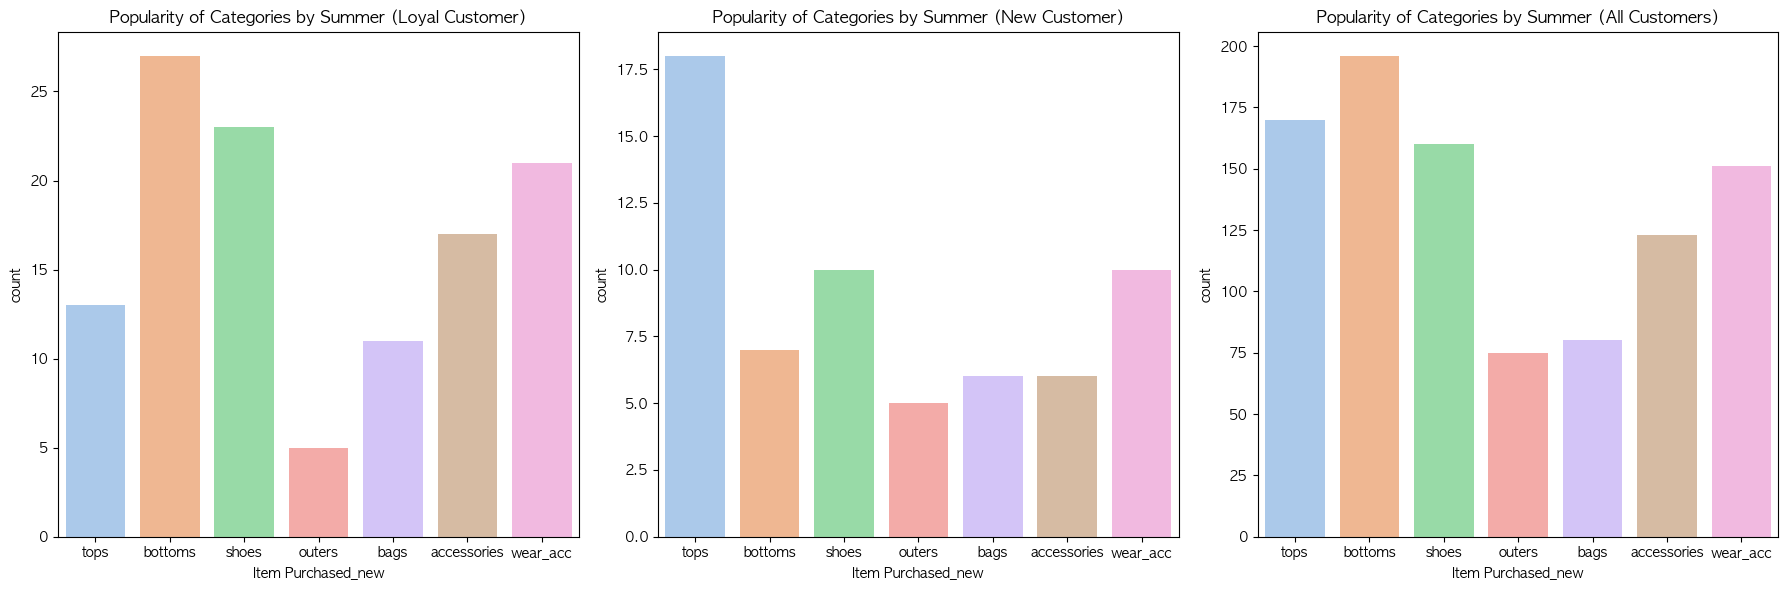

In [21]:
x_order = ['tops', 'bottoms', 'shoes', 'outers', 'bags', 'accessories', 'wear_acc']
plt.figure(figsize=(18, 6))

# Loyal Customer에 대한 그래프
plt.subplot(1, 3, 1)
ax1 = sns.countplot(data=df_cus[(df_cus['Customer Type'] == 'Loyal Customer') & (df_cus['Season'] == 'Summer')], x='Item Purchased_new', 
                    palette='pastel', order=x_order)
plt.title('Popularity of Categories by Summer (Loyal Customer)')
plt.legend().remove()

# New Customer에 대한 그래프
plt.subplot(1, 3, 2)
ax2 = sns.countplot(data=df_cus[(df_cus['Customer Type'] == 'New Customer') & (df_cus['Season'] == 'Summer')], x='Item Purchased_new', 
                    palette='pastel', order=x_order)
plt.title('Popularity of Categories by Summer (New Customer)')
plt.legend().remove()

# 모든 고객에 대한 그래프
plt.subplot(1, 3, 3)
ax3 = sns.countplot(data=df_cus[df_cus['Season'] == 'Summer'], x='Item Purchased_new', 
                    palette='pastel', order=x_order)
plt.title('Popularity of Categories by Summer (All Customers)')
plt.legend().remove()


plt.tight_layout()
plt.show()


In [22]:
df_cus[(df_cus['Customer Type'] == 'Loyal Customer') & (df_cus['Season'] == 'Summer')]['Item Purchased'].value_counts().index[:10]

Index(['Jewelry', 'Pants', 'Scarf', 'Boots', 'Sneakers', 'Handbag', 'Dress',
       'Hat', 'Coat', 'Backpack'],
      dtype='object', name='Item Purchased')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


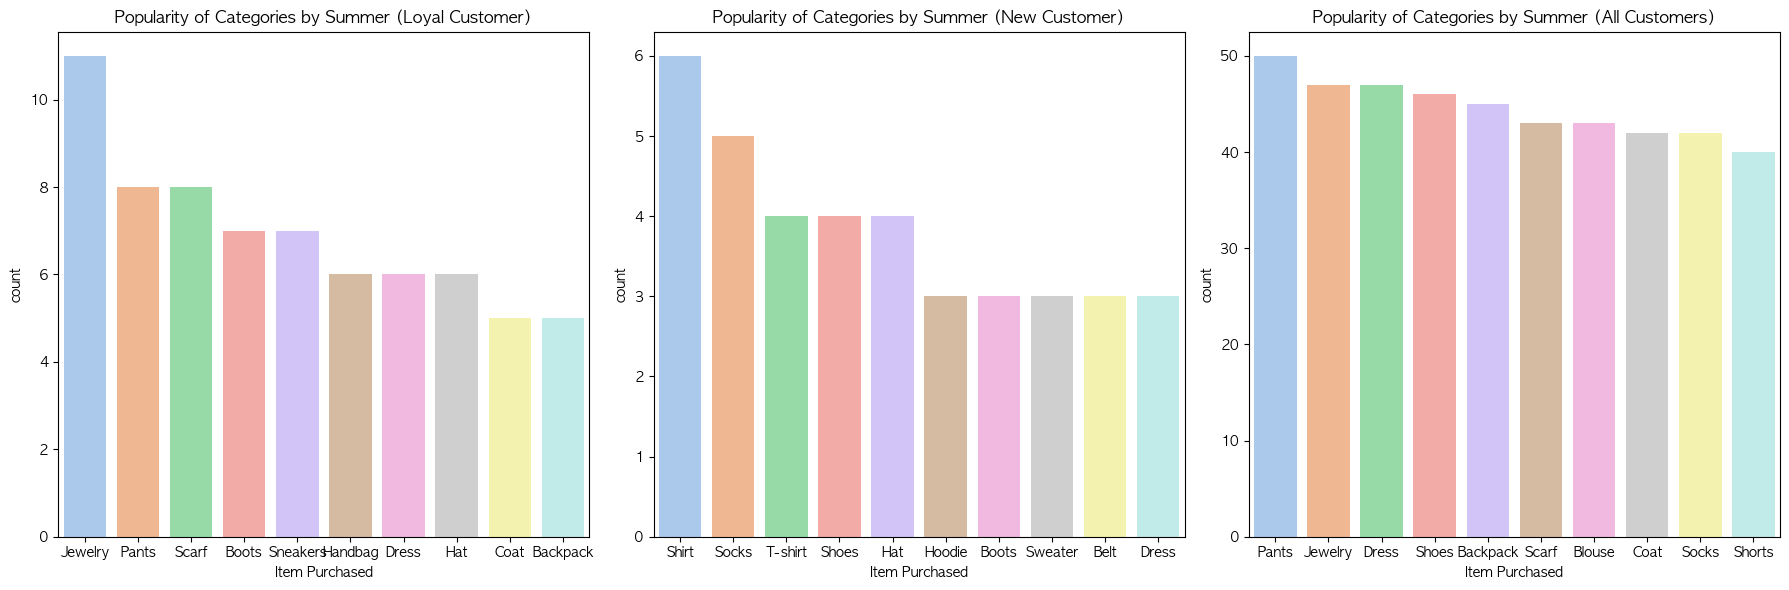

In [23]:
plt.figure(figsize=(18, 6))

# Loyal Customer에 대한 그래프
plt.subplot(1, 3, 1)
top_items1 = df_cus[(df_cus['Customer Type'] == 'Loyal Customer') & (df_cus['Season'] == 'Summer')]['Item Purchased'].value_counts().index[:10]
ax1 = sns.countplot(data=df_cus[(df_cus['Customer Type'] == 'Loyal Customer') & (df_cus['Season'] == 'Summer')], x='Item Purchased', 
                    palette='pastel', order=top_items1)
plt.title('Popularity of Categories by Summer (Loyal Customer)')
plt.legend().remove()

# New Customer에 대한 그래프
plt.subplot(1, 3, 2)
top_items2 = df_cus[(df_cus['Customer Type'] == 'New Customer') & (df_cus['Season'] == 'Summer')]['Item Purchased'].value_counts().index[:10]
ax2 = sns.countplot(data=df_cus[(df_cus['Customer Type'] == 'New Customer') & (df_cus['Season'] == 'Summer')], x='Item Purchased', 
                    palette='pastel', order=top_items2)
plt.title('Popularity of Categories by Summer (New Customer)')
plt.legend().remove()

# 모든 고객에 대한 그래프
plt.subplot(1, 3, 3)
top_items3 = df_cus[df_cus['Season'] == 'Summer']['Item Purchased'].value_counts().index[:10]
ax3 = sns.countplot(data=df_cus[df_cus['Season'] == 'Summer'], x='Item Purchased', 
                    palette='pastel', order=top_items3)
plt.title('Popularity of Categories by Summer (All Customers)')
plt.legend().remove()


plt.tight_layout()
plt.show()


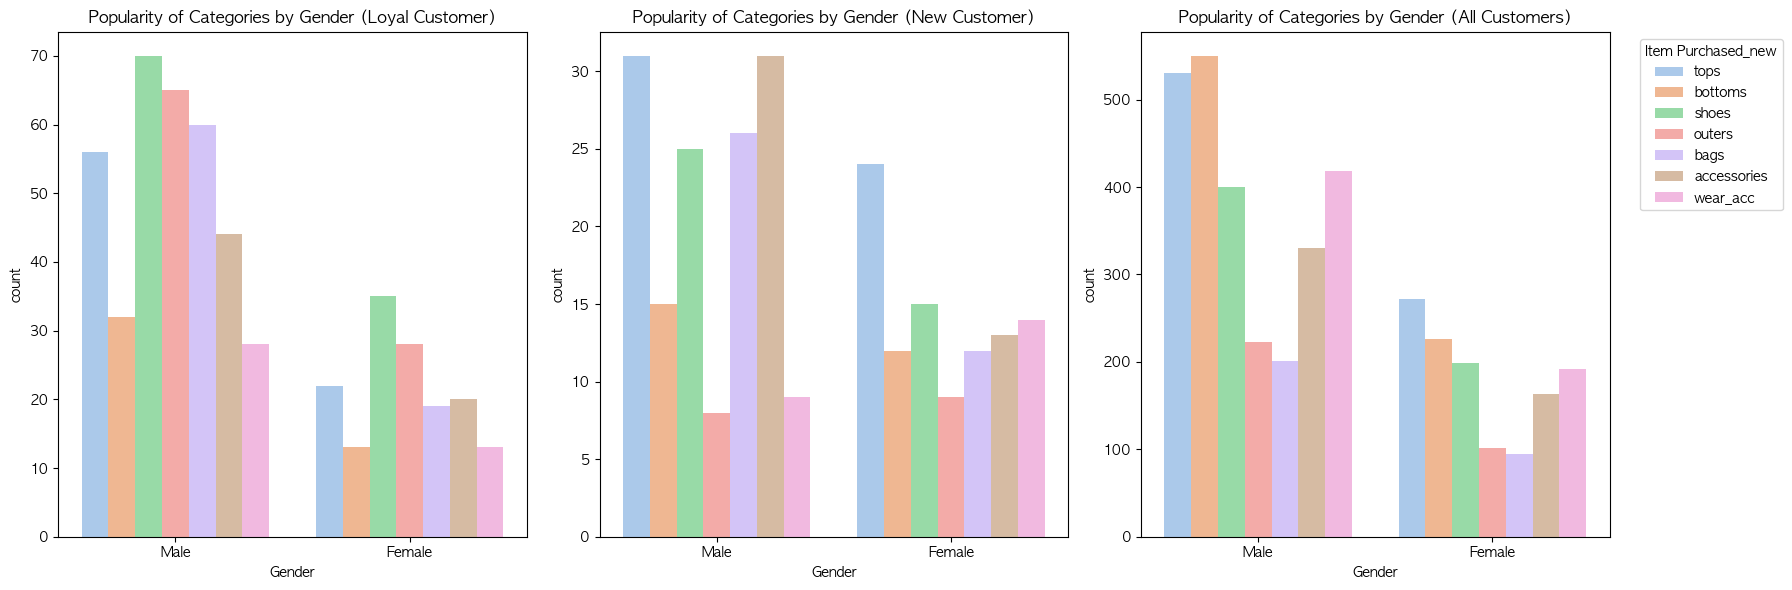

In [24]:
plt.figure(figsize=(18, 6))
age_order = ['10-20s', '30s', '40s', '50s', '60s+']

# Loyal Customer에 대한 그래프
plt.subplot(1, 3, 1)
ax1 = sns.countplot(data=df_cus[df_cus['Customer Type'] == 'Loyal Customer'], 
                    x='Gender', hue='Item Purchased_new', 
                    palette='pastel')
plt.title('Popularity of Categories by Gender (Loyal Customer)')
plt.legend().remove()

# New Customer에 대한 그래프
plt.subplot(1, 3, 2)
ax2 = sns.countplot(data=df_cus[df_cus['Customer Type'] == 'New Customer'], 
                    x='Gender', hue='Item Purchased_new', 
                    palette='pastel')
plt.title('Popularity of Categories by Gender (New Customer)')
plt.legend().remove()

# 모든 고객에 대한 그래프
plt.subplot(1, 3, 3)
ax3 = sns.countplot(data=df_cus, x='Gender', hue='Item Purchased_new', 
                    palette='pastel')
plt.title('Popularity of Categories by Gender (All Customers)')
plt.legend(title='Item Purchased_new', bbox_to_anchor=(1.05, 1), loc='upper left')



plt.tight_layout()
plt.show()


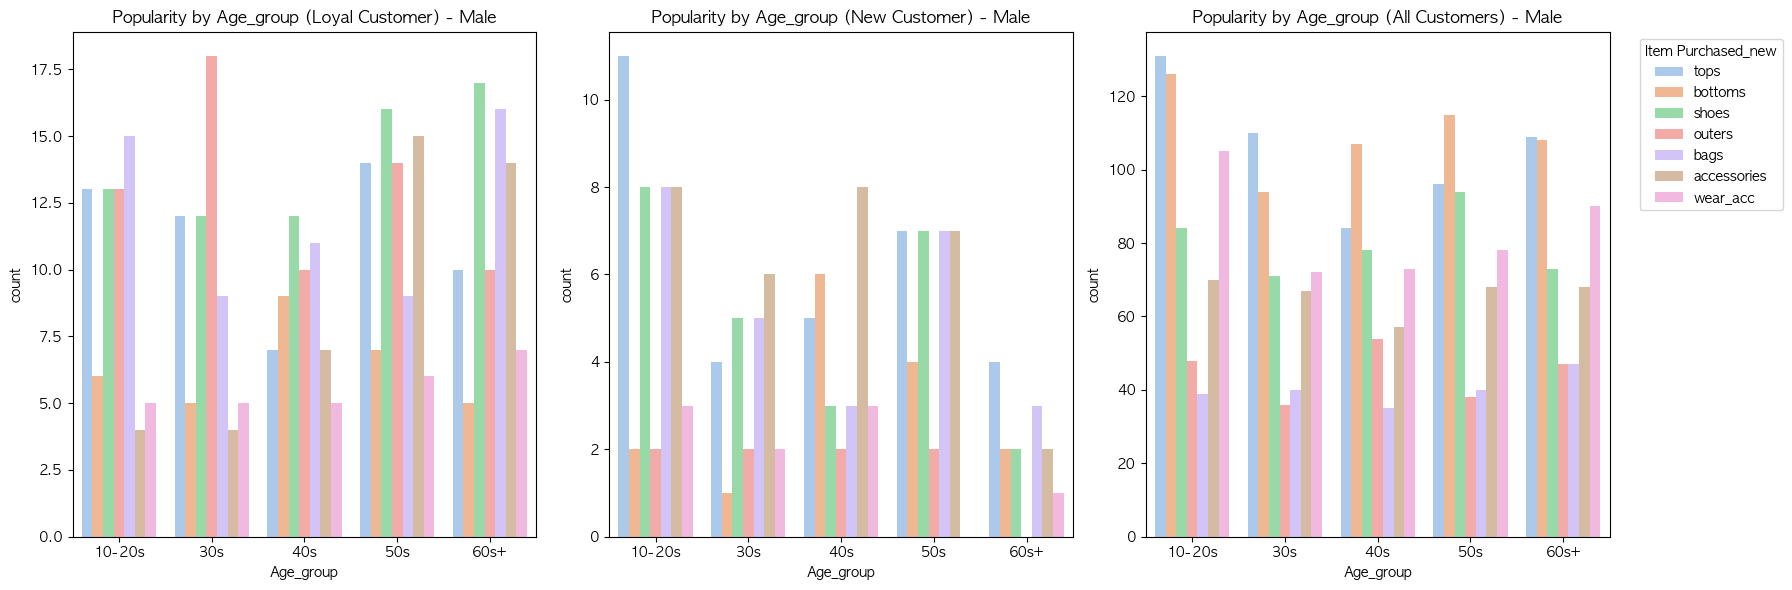

In [25]:
plt.figure(figsize=(18, 6))
age_order = ['10-20s', '30s', '40s', '50s', '60s+']

# Loyal Customer에 대한 그래프
plt.subplot(1, 3, 1)
ax1 = sns.countplot(data=df_cus[(df_cus['Customer Type'] == 'Loyal Customer') & (df_cus['Gender'] == 'Male')], 
                    x='Age_group', hue='Item Purchased_new', 
                    palette='pastel', order=age_order)
plt.title('Popularity by Age_group (Loyal Customer) - Male')
plt.legend().remove()

# New Customer에 대한 그래프
plt.subplot(1, 3, 2)
ax2 = sns.countplot(data=df_cus[(df_cus['Customer Type'] == 'New Customer') & (df_cus['Gender'] == 'Male')], 
                    x='Age_group', hue='Item Purchased_new', 
                    palette='pastel', order=age_order)
plt.title('Popularity by Age_group (New Customer) - Male')
plt.legend().remove()

# 모든 고객에 대한 그래프
plt.subplot(1, 3, 3)
ax3 = sns.countplot(data=df_cus[df_cus['Gender'] == 'Male'], x='Age_group', hue='Item Purchased_new', 
                    palette='pastel', order=age_order)
plt.title('Popularity by Age_group (All Customers) - Male')
plt.legend(title='Item Purchased_new', bbox_to_anchor=(1.05, 1), loc='upper left')



plt.tight_layout()
plt.show()


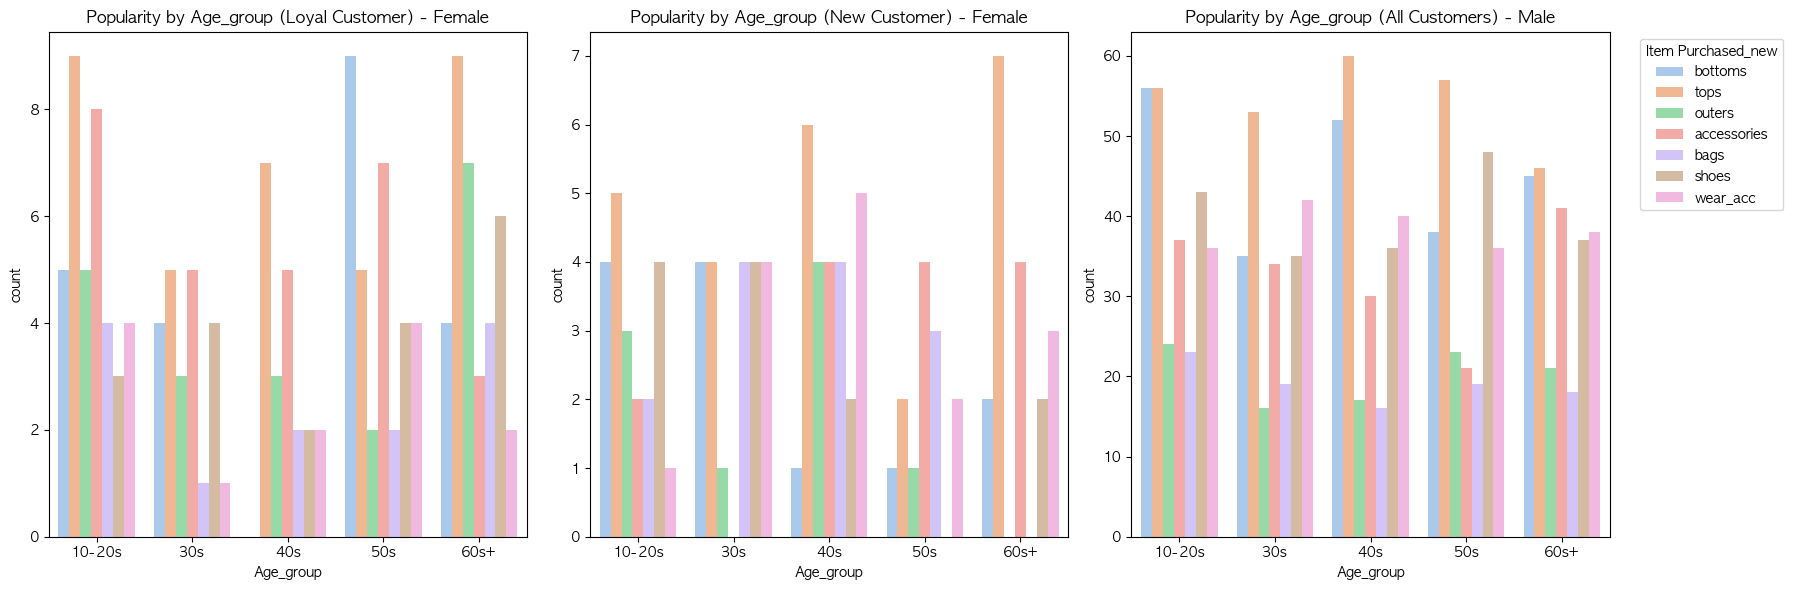

In [26]:
plt.figure(figsize=(18, 6))
age_order = ['10-20s', '30s', '40s', '50s', '60s+']

# Loyal Customer에 대한 그래프
plt.subplot(1, 3, 1)
ax1 = sns.countplot(data=df_cus[(df_cus['Customer Type'] == 'Loyal Customer') & (df_cus['Gender'] == 'Female')], 
                    x='Age_group', hue='Item Purchased_new', 
                    palette='pastel', order=age_order)
plt.title('Popularity by Age_group (Loyal Customer) - Female')
plt.legend().remove()

# New Customer에 대한 그래프
plt.subplot(1, 3, 2)
ax2 = sns.countplot(data=df_cus[(df_cus['Customer Type'] == 'New Customer') & (df_cus['Gender'] == 'Female')], 
                    x='Age_group', hue='Item Purchased_new', 
                    palette='pastel', order=age_order)
plt.title('Popularity by Age_group (New Customer) - Female')
plt.legend().remove()

# 모든 고객에 대한 그래프
plt.subplot(1, 3, 3)
ax3 = sns.countplot(data=df_cus[df_cus['Gender'] == 'Female'], x='Age_group', hue='Item Purchased_new', 
                    palette='pastel', order=age_order)
plt.title('Popularity by Age_group (All Customers) - Male')
plt.legend(title='Item Purchased_new', bbox_to_anchor=(1.05, 1), loc='upper left')



plt.tight_layout()
plt.show()


# 여성에서 각 그룹별 선호 색깔

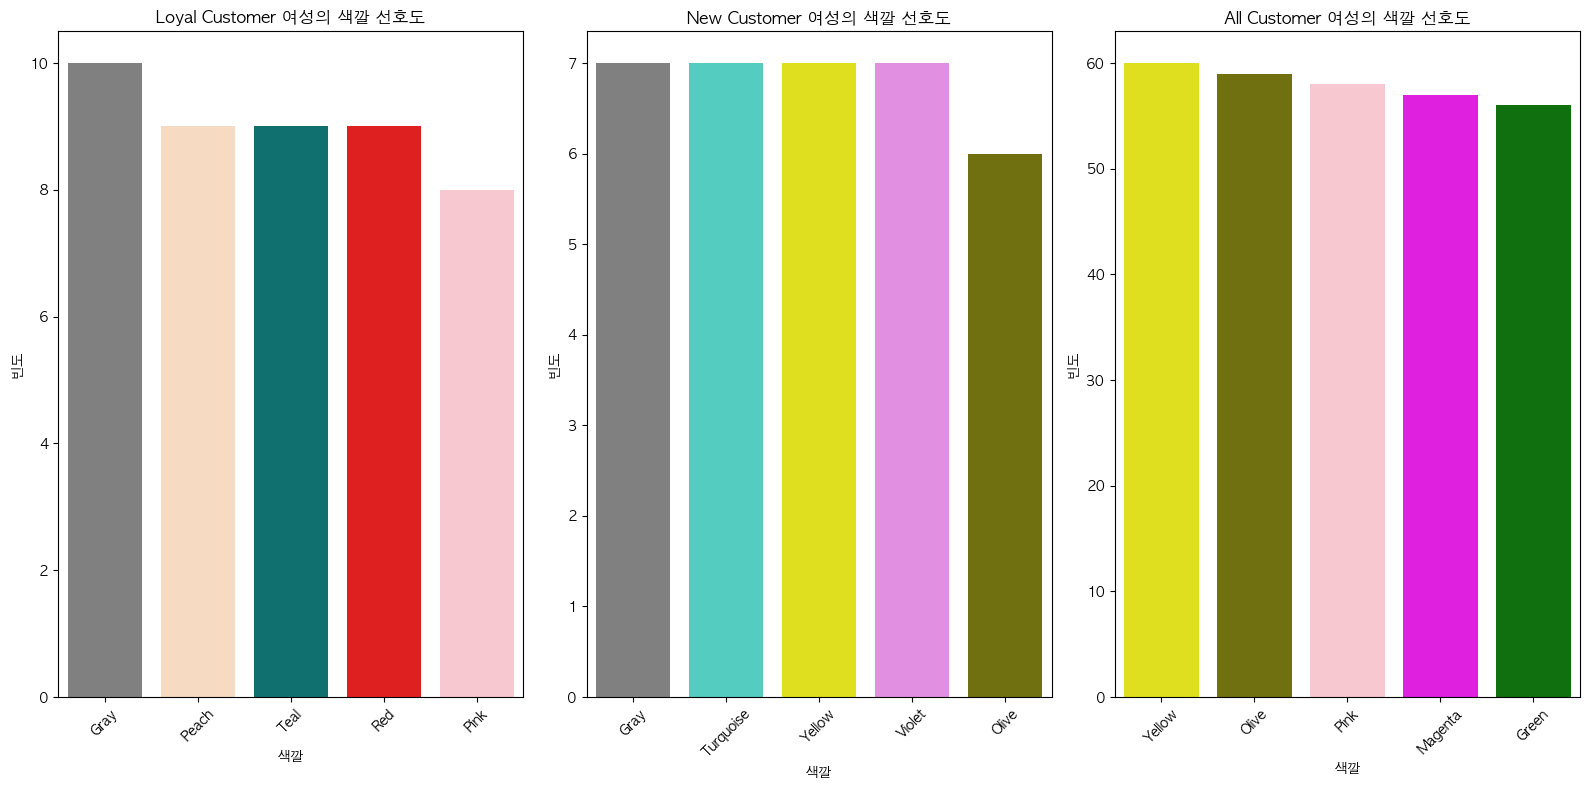

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# 색상 이름을 matplotlib에서 인식할 수 있는 색상 코드로 매핑
color_mapping = {
    "Gray": "gray",
    "Maroon": "maroon",
    "Turquoise": "turquoise",
    "White": "lightgray",
    "Charcoal": "dimgray",
    "Silver": "silver",
    "Pink": "pink",
    "Purple": "purple",
    "Olive": "olive",
    "Gold": "gold",
    "Violet": "violet",
    "Teal": "teal",
    "Lavender": "lavender",
    "Black": "black",
    "Green": "green",
    "Peach": "peachpuff",
    "Red": "red",
    "Cyan": "cyan",
    "Brown": "brown",
    "Beige": "beige",
    "Orange": "orange",
    "Indigo": "indigo",
    "Yellow": "yellow",
    "Magenta": "magenta",
    "Blue": "blue"
}

plt.figure(figsize=(16, 8))

# 여성의 색깔 선호 시각화
plt.subplot(1, 3, 1)  # 1행 2열 중 첫 번째 그래프
d1 = df_cus[(df_cus['Gender'] == 'Female') & (df_cus['Customer Type'] == 'Loyal Customer')]['Color'].value_counts().index[:5]
sns.countplot(data=df_cus[(df_cus['Gender'] == 'Female') & (df_cus['Customer Type'] == 'Loyal Customer')], 
              x='Color', order=d1, palette=color_mapping)
plt.title('Loyal Customer 여성의 색깔 선호도')
plt.xlabel('색깔')
plt.ylabel('빈도')
plt.xticks(rotation=45)

# 남성의 색깔 선호 시각화
plt.subplot(1, 3, 2)  # 1행 2열 중 두 번째 그래프
d2 = df_cus[(df_cus['Gender'] == 'Female') & (df_cus['Customer Type'] == 'New Customer')]['Color'].value_counts().index[:5]
sns.countplot(data=df_cus[(df_cus['Gender'] == 'Female') & (df_cus['Customer Type'] == 'New Customer')], 
              x='Color', order=d2, palette=color_mapping)
plt.title('New Customer 여성의 색깔 선호도')
plt.xlabel('색깔')
plt.ylabel('빈도')
plt.xticks(rotation=45)

# 모든 고객에 대한 그래프
plt.subplot(1, 3, 3)
d3 = df_cus[df_cus['Gender'] == 'Female']['Color'].value_counts().index[:5]
sns.countplot(data=df_cus[df_cus['Gender'] == 'Female'], 
              x='Color', order=d3, palette=color_mapping)
plt.title('All Customer 여성의 색깔 선호도')
plt.xlabel('색깔')
plt.ylabel('빈도')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# 남성에서 각 그룹별 선호 색깔

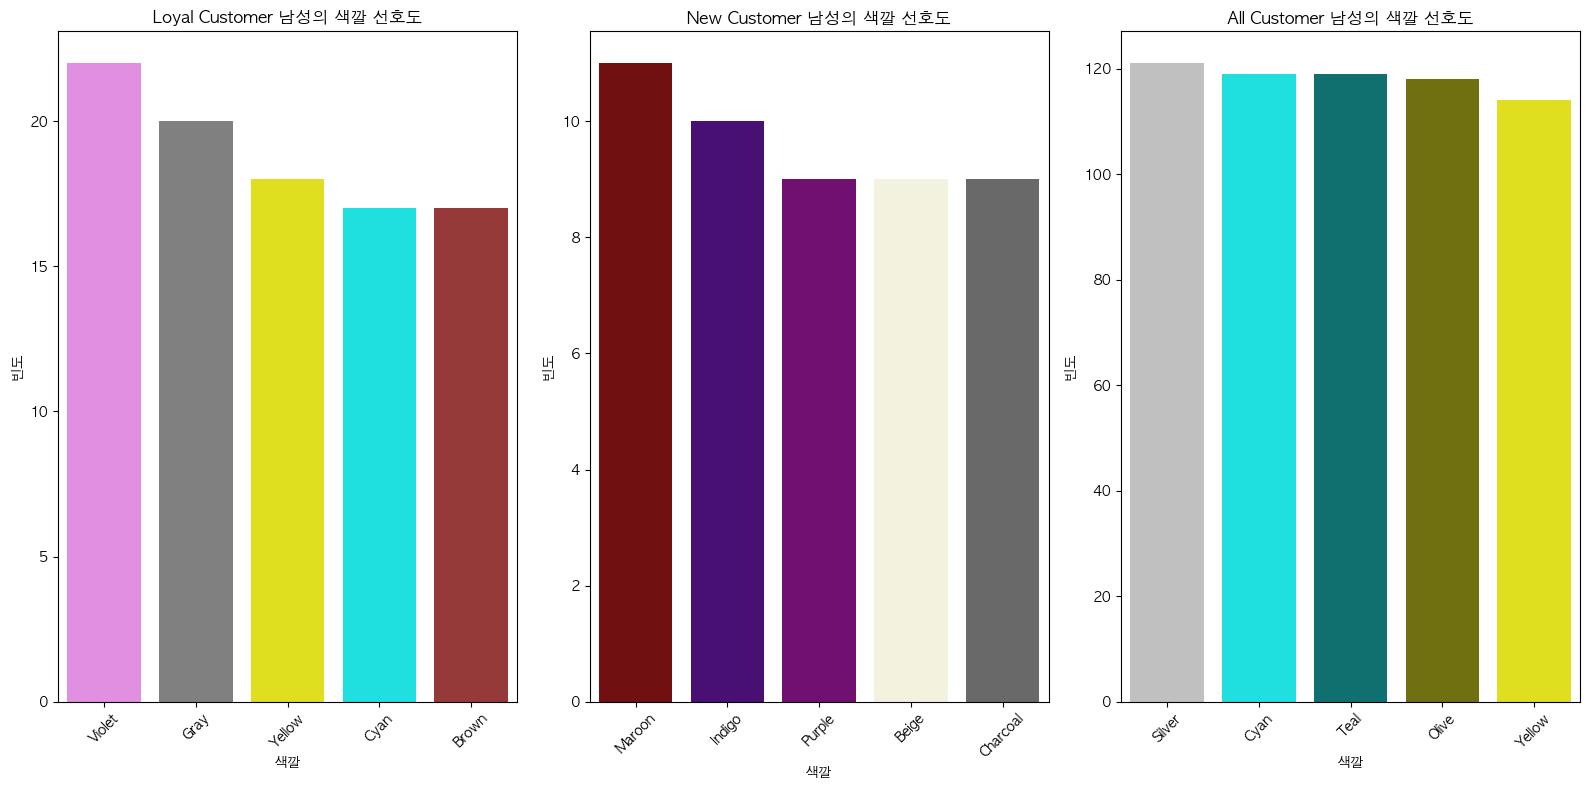

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# 색상 이름을 matplotlib에서 인식할 수 있는 색상 코드로 매핑
color_mapping = {
    "Gray": "gray",
    "Maroon": "maroon",
    "Turquoise": "turquoise",
    "White": "lightgray",
    "Charcoal": "dimgray",
    "Silver": "silver",
    "Pink": "pink",
    "Purple": "purple",
    "Olive": "olive",
    "Gold": "gold",
    "Violet": "violet",
    "Teal": "teal",
    "Lavender": "lavender",
    "Black": "black",
    "Green": "green",
    "Peach": "peachpuff",
    "Red": "red",
    "Cyan": "cyan",
    "Brown": "brown",
    "Beige": "beige",
    "Orange": "orange",
    "Indigo": "indigo",
    "Yellow": "yellow",
    "Magenta": "magenta",
    "Blue": "blue"
}

plt.figure(figsize=(16, 8))

# 여성의 색깔 선호 시각화
plt.subplot(1, 3, 1)  # 1행 2열 중 첫 번째 그래프
d1 = df_cus[(df_cus['Gender'] == 'Male') & (df_cus['Customer Type'] == 'Loyal Customer')]['Color'].value_counts().index[:5]
sns.countplot(data=df_cus[(df_cus['Gender'] == 'Male') & (df_cus['Customer Type'] == 'Loyal Customer')], 
              x='Color', order=d1, palette=color_mapping)
plt.title('Loyal Customer 남성의 색깔 선호도')
plt.xlabel('색깔')
plt.ylabel('빈도')
plt.xticks(rotation=45)

# 남성의 색깔 선호 시각화
plt.subplot(1, 3, 2)  # 1행 2열 중 두 번째 그래프
d2 = df_cus[(df_cus['Gender'] == 'Male') & (df_cus['Customer Type'] == 'New Customer')]['Color'].value_counts().index[:5]
sns.countplot(data=df_cus[(df_cus['Gender'] == 'Male') & (df_cus['Customer Type'] == 'New Customer')], 
              x='Color', order=d2, palette=color_mapping)
plt.title('New Customer 남성의 색깔 선호도')
plt.xlabel('색깔')
plt.ylabel('빈도')
plt.xticks(rotation=45)

# 모든 고객에 대한 그래프
plt.subplot(1, 3, 3)
d3 = df_cus[df_cus['Gender'] == 'Male']['Color'].value_counts().index[:5]
sns.countplot(data=df_cus[df_cus['Gender'] == 'Male'], 
              x='Color', order=d3, palette=color_mapping)
plt.title('All Customer 남성의 색깔 선호도')
plt.xlabel('색깔')
plt.ylabel('빈도')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [29]:
df_cus['location_new'].value_counts()

location_new
West         1170
South        1119
Midwest       937
Northeast     674
Name: count, dtype: int64

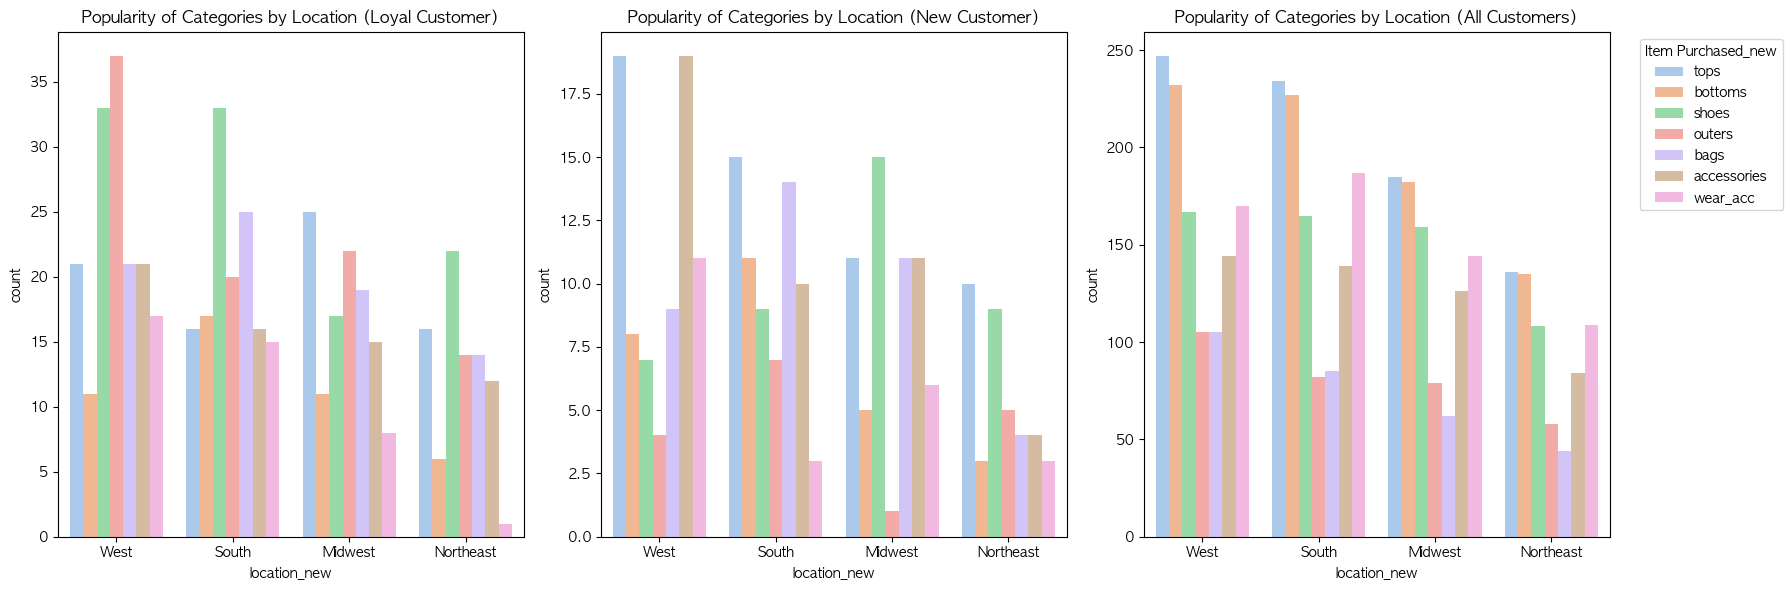

In [30]:
location_order = ['West', 'South', 'Midwest', 'Northeast']
plt.figure(figsize=(18, 6))

# Loyal Customer에 대한 그래프
plt.subplot(1, 3, 1)
ax1 = sns.countplot(data=df_cus[df_cus['Customer Type'] == 'Loyal Customer'], x='location_new', hue='Item Purchased_new', 
                    palette='pastel', order=location_order)
plt.title('Popularity of Categories by Location (Loyal Customer)')
plt.legend().remove()

# New Customer에 대한 그래프
plt.subplot(1, 3, 2)
ax2 = sns.countplot(data=df_cus[df_cus['Customer Type'] == 'New Customer'], x='location_new', hue='Item Purchased_new', 
                    palette='pastel', order=location_order)
plt.title('Popularity of Categories by Location (New Customer)')
plt.legend().remove()

# 모든 고객에 대한 그래프
plt.subplot(1, 3, 3)
ax3 = sns.countplot(data=df_cus, x='location_new', hue='Item Purchased_new', 
                    palette='pastel', order=location_order)
plt.title('Popularity of Categories by Location (All Customers)')
plt.legend(title='Item Purchased_new', bbox_to_anchor=(1.05, 1), loc='upper left')



plt.tight_layout()
plt.show()


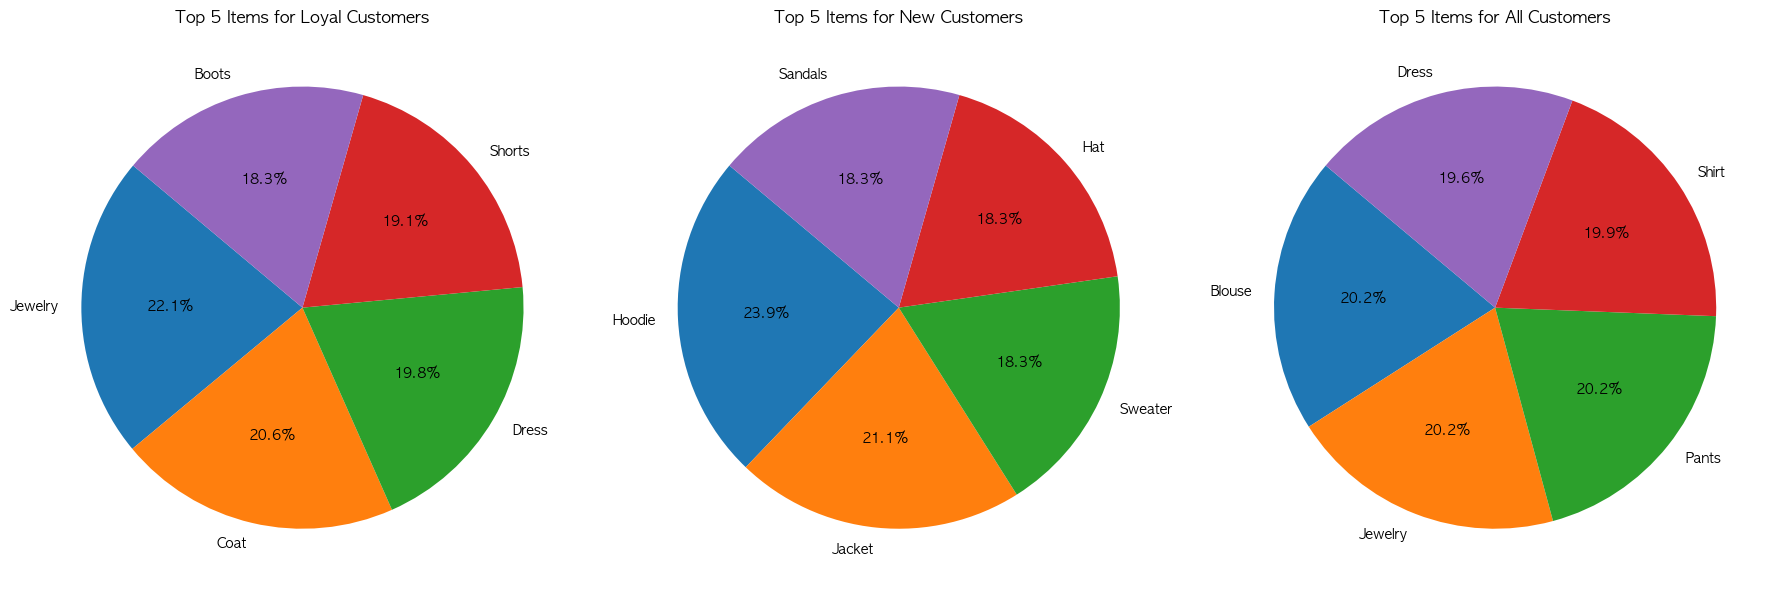

In [31]:
import matplotlib.pyplot as plt

# Loyal Customer의 상위 5개 아이템
loyal_top_items = df_cus[df_cus['Customer Type'] == 'Loyal Customer']['Item Purchased'].value_counts().head(5)
# New Customer의 상위 5개 아이템
new_top_items = df_cus[df_cus['Customer Type'] == 'New Customer']['Item Purchased'].value_counts().head(5)
# 모든 고객의 상위 5개 아이템
all_top_items = df_cus['Item Purchased'].value_counts().head(5)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loyal Customer에 대한 파이 차트
axes[0].pie(loyal_top_items, labels=loyal_top_items.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
axes[0].set_title('Top 5 Items for Loyal Customers')

# New Customer에 대한 파이 차트
axes[1].pie(new_top_items, labels=new_top_items.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
axes[1].set_title('Top 5 Items for New Customers')

# 모든 고객에 대한 파이 차트
axes[2].pie(all_top_items, labels=all_top_items.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
axes[2].set_title('Top 5 Items for All Customers')

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()


In [32]:
df_cus[df_cus['Customer Type'] == 'Loyal Customer']['Item Purchased_new'].value_counts()

Item Purchased_new
bottoms        105
tops            93
wear_acc        79
shoes           78
accessories     64
outers          45
bags            41
Name: count, dtype: int64

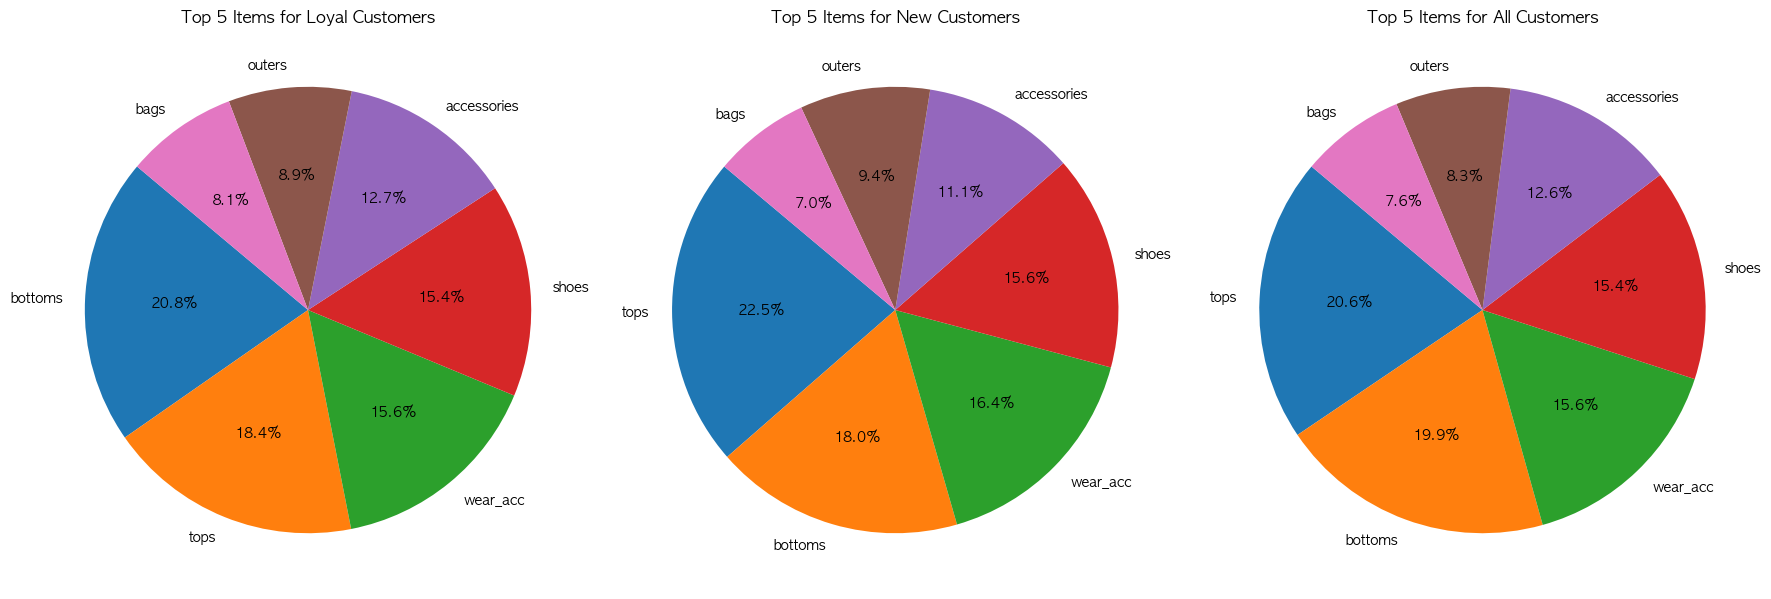

In [33]:
import matplotlib.pyplot as plt

# Loyal Customer
loyal_top_items = df_cus[df_cus['Customer Type'] == 'Loyal Customer']['Item Purchased_new'].value_counts()
# New Customer
new_top_items = df_cus[df_cus['Customer Type'] == 'New Customer']['Item Purchased_new'].value_counts()
# 모든 고객
all_top_items = df_cus['Item Purchased_new'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loyal Customer에 대한 파이 차트
axes[0].pie(loyal_top_items, labels=loyal_top_items.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
axes[0].set_title('Top 5 Items for Loyal Customers')

# New Customer에 대한 파이 차트
axes[1].pie(new_top_items, labels=new_top_items.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
axes[1].set_title('Top 5 Items for New Customers')

# 모든 고객에 대한 파이 차트
axes[2].pie(all_top_items, labels=all_top_items.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
axes[2].set_title('Top 5 Items for All Customers')

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()


In [34]:
df_loyal_age = df_cus[(df_cus['Age_group'] == '50s') | (df_cus['Age_group'] == '60s+')]
df_new_age = df_cus[(df_cus['Age_group'] == '10-20s') | (df_cus['Age_group'] == '40s')]

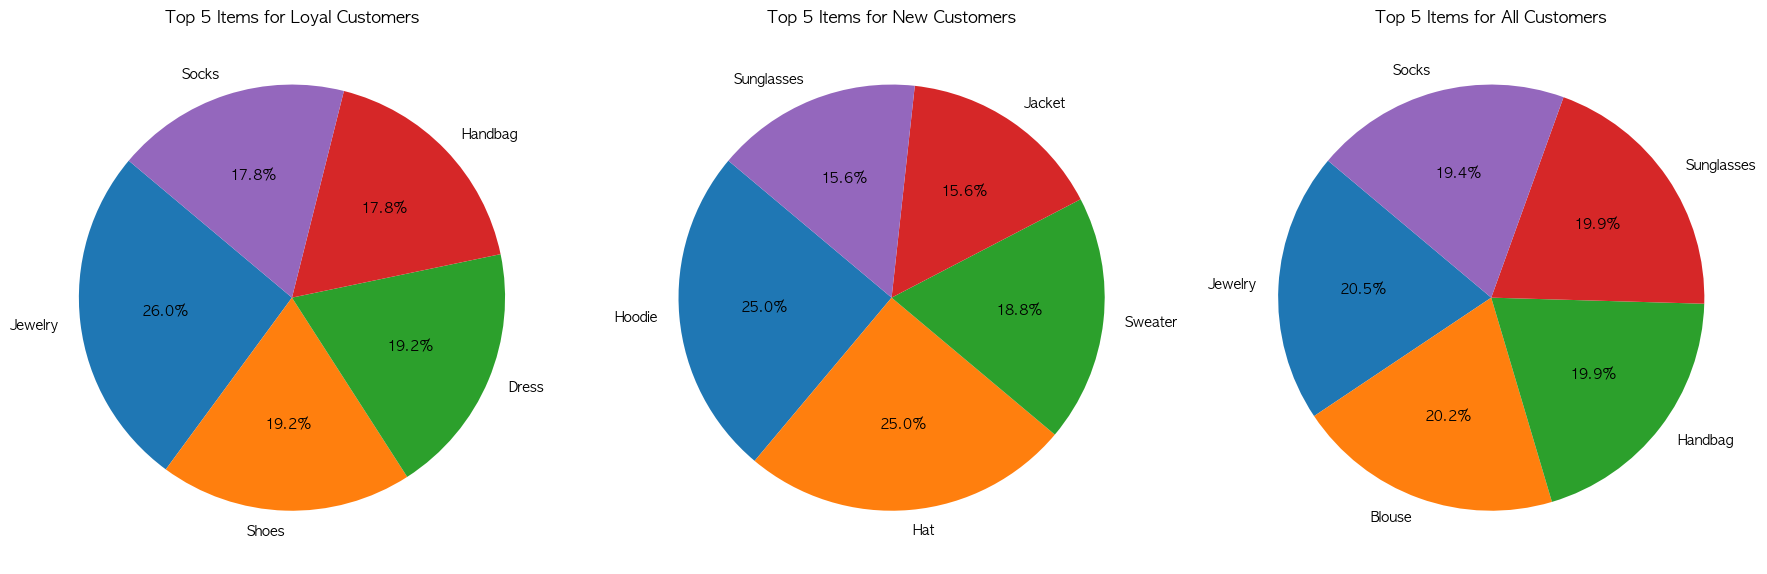

In [35]:
import matplotlib.pyplot as plt

# Loyal Customer
loyal_top_items = df_loyal_age[df_loyal_age['Customer Type'] == 'Loyal Customer']['Item Purchased'].value_counts().head(5)
# New Customer
new_top_items = df_loyal_age[df_loyal_age['Customer Type'] == 'New Customer']['Item Purchased'].value_counts().head(5)
# 모든 고객
all_top_items = df_loyal_age['Item Purchased'].value_counts().head(5)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loyal Customer에 대한 파이 차트
axes[0].pie(loyal_top_items, labels=loyal_top_items.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
axes[0].set_title('Top 5 Items for Loyal Customers')

# New Customer에 대한 파이 차트
axes[1].pie(new_top_items, labels=new_top_items.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
axes[1].set_title('Top 5 Items for New Customers')

# 모든 고객에 대한 파이 차트
axes[2].pie(all_top_items, labels=all_top_items.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
axes[2].set_title('Top 5 Items for All Customers')

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()

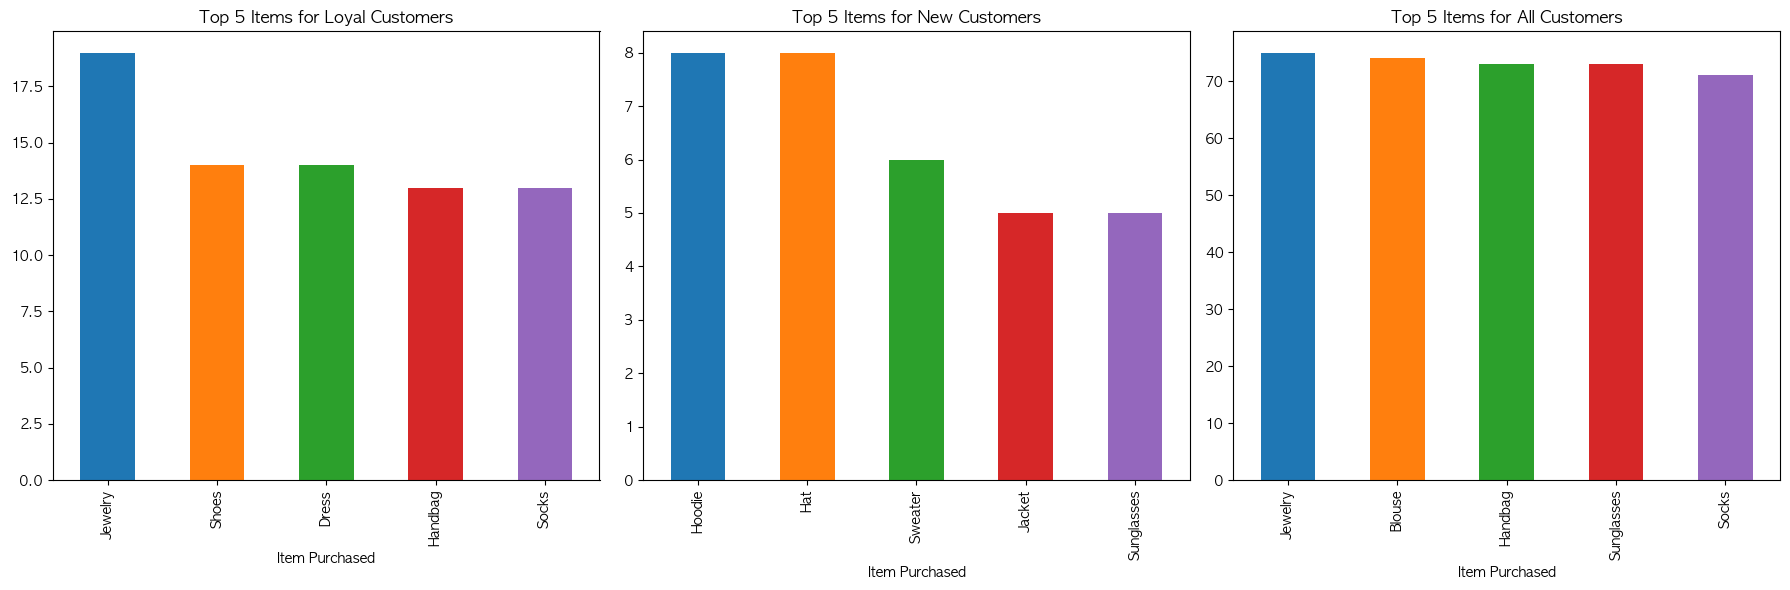

In [36]:
import matplotlib.pyplot as plt

# Loyal Customer
loyal_top_items = df_loyal_age[df_loyal_age['Customer Type'] == 'Loyal Customer']['Item Purchased'].value_counts().head(5)
# New Customer
new_top_items = df_loyal_age[df_loyal_age['Customer Type'] == 'New Customer']['Item Purchased'].value_counts().head(5)
# 모든 고객
all_top_items = df_loyal_age['Item Purchased'].value_counts().head(5)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loyal Customer에 대한 막대 그래프
loyal_top_items.plot(kind='bar', ax=axes[0], color=plt.cm.tab10.colors)
axes[0].set_title('Top 5 Items for Loyal Customers')

# New Customer에 대한 막대 그래프
new_top_items.plot(kind='bar', ax=axes[1], color=plt.cm.tab10.colors)
axes[1].set_title('Top 5 Items for New Customers')

# 모든 고객에 대한 막대 그래프
all_top_items.plot(kind='bar', ax=axes[2], color=plt.cm.tab10.colors)
axes[2].set_title('Top 5 Items for All Customers')

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()


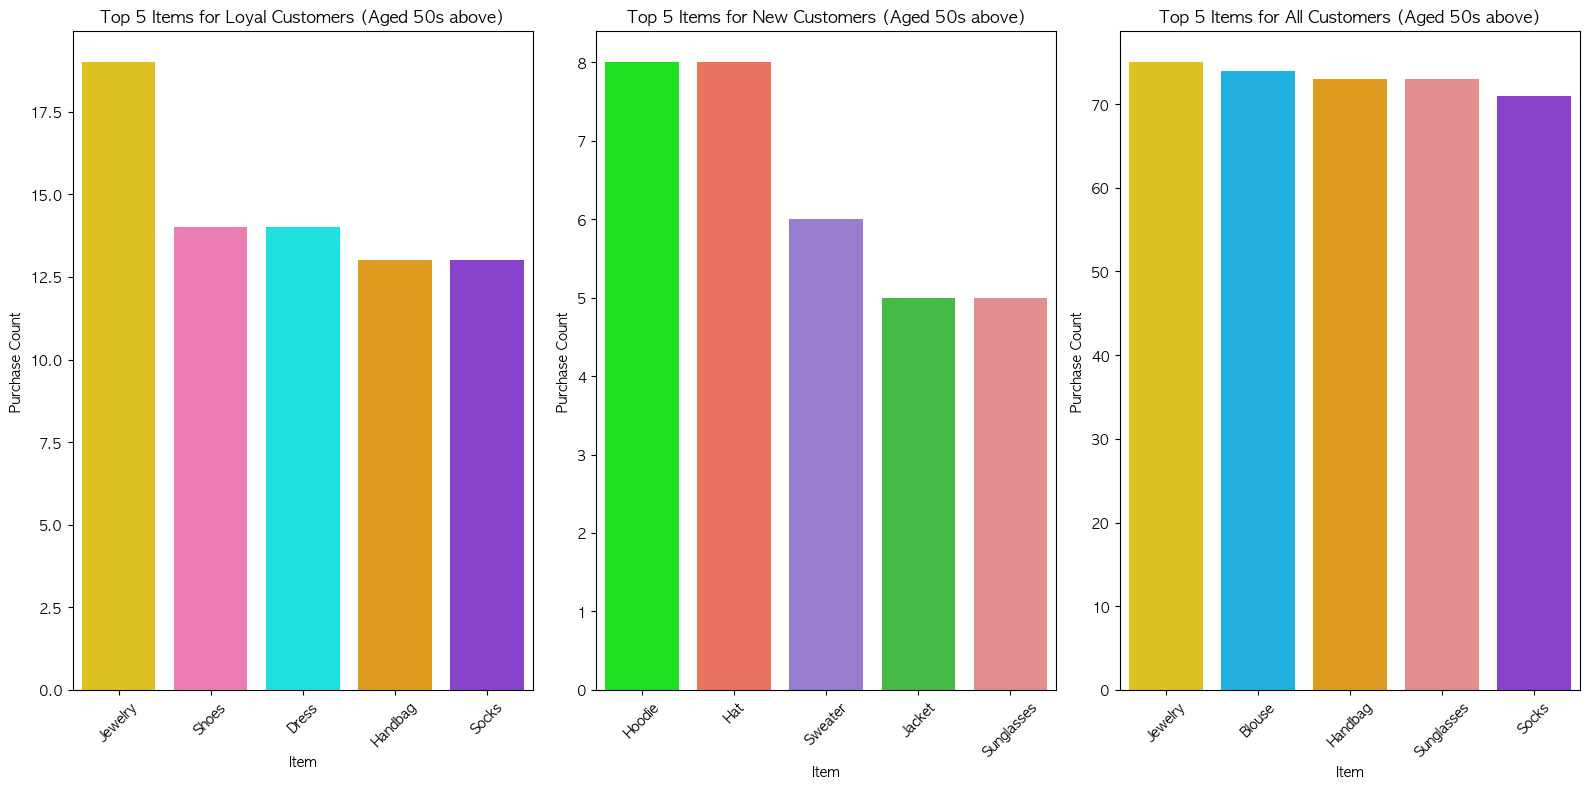

In [37]:
df_loyal_age = df_cus[(df_cus['Age_group'] == '50s') | (df_cus['Age_group'] == '60s+')]

# 색상 이름을 matplotlib에서 인식할 수 있는 색상 코드로 매핑
color_mapping = {
    "Jewelry": "#FFD700",     # 금색
    "Shoes": "#FF69B4",       # 핑크
    "Dress": "#00FFFF",       # 청록색
    "Handbag": "#FFA500",     # 주황색
    "Socks": "#8A2BE2",       # 보라색
    "Hoodie": "#00FF00",      # 녹색
    "Hat": "#FF6347",         # 주황빨강
    "Sweater": "#9370DB",     # 자주색
    "Jacket": "#32CD32",      # 라임색
    "Sunglasses": "#F08080",  # 연분홍
    "Blouse": "#00BFFF"       # 하늘색
}

plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)  # 1행 2열 중 첫 번째 그래프
d1 = df_loyal_age[df_loyal_age['Customer Type'] == 'Loyal Customer']['Item Purchased'].value_counts().head(5)
sns.countplot(data=df_loyal_age[df_loyal_age['Customer Type'] == 'Loyal Customer'], 
              x='Item Purchased', order=d1.index, palette=color_mapping)
plt.title('Top 5 Items for Loyal Customers (Aged 50s above)')
plt.xlabel('Item')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45)


plt.subplot(1, 3, 2)  # 1행 2열 중 두 번째 그래프
d2 = df_loyal_age[df_loyal_age['Customer Type'] == 'New Customer']['Item Purchased'].value_counts().head(5)
sns.countplot(data=df_loyal_age[df_loyal_age['Customer Type'] == 'New Customer'], 
              x='Item Purchased', order=d2.index, palette=color_mapping)
plt.title('Top 5 Items for New Customers (Aged 50s above)')
plt.xlabel('Item')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45)

# 모든 고객에 대한 그래프
plt.subplot(1, 3, 3)
d3 = df_loyal_age['Item Purchased'].value_counts().head(5)
sns.countplot(data=df_loyal_age, 
              x='Item Purchased', order=d3.index, palette=color_mapping)
plt.title('Top 5 Items for All Customers (Aged 50s above)')
plt.xlabel('Item')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


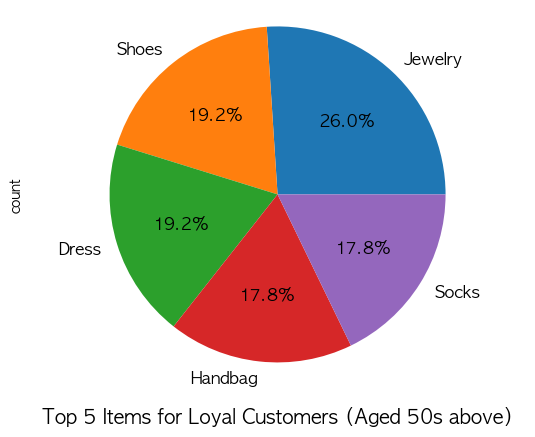

In [38]:
# Loyal Customer에 대한 파이 차트
df_loyal_age = df_cus[(df_cus['Age_group'] == '50s') | (df_cus['Age_group'] == '60s+')]
loyal_top_items = df_loyal_age[df_loyal_age['Customer Type'] == 'Loyal Customer']['Item Purchased'].value_counts().head(5)

#loyal_top_items.pie(loyal_top_items, labels=loyal_top_items.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
loyal_top_items.plot(kind = 'pie', fontsize = 12, autopct = '%1.1f%%')
plt.xlabel('Top 5 Items for Loyal Customers (Aged 50s above)', weight = "bold", fontsize = 14, labelpad = 20)
#plt.legend(labels = loyal_top_items.index, loc = "best")
plt.axis('equal')
plt.show()


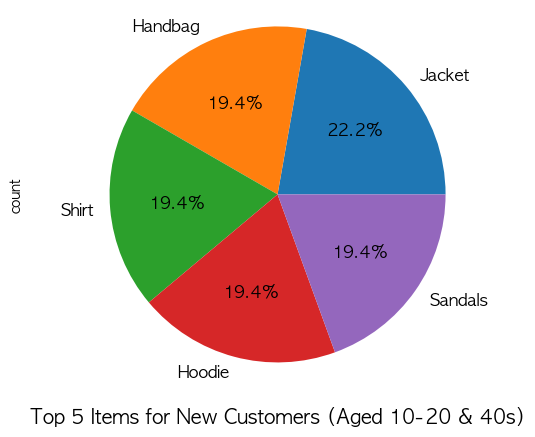

In [39]:
# Loyal Customer에 대한 파이 차트
df_new_age = df_cus[(df_cus['Age_group'] == '10-20s') | (df_cus['Age_group'] == '40s')]
new_top_items = df_new_age[df_new_age['Customer Type'] == 'New Customer']['Item Purchased'].value_counts().head(5)
#new_top_items
#loyal_top_items.pie(loyal_top_items, labels=loyal_top_items.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
new_top_items.plot(kind = 'pie', fontsize = 12, autopct = '%1.1f%%')
plt.xlabel('Top 5 Items for New Customers (Aged 10-20 & 40s)', weight = "bold", fontsize = 14, labelpad = 20)
#plt.legend(labels = loyal_top_items.index, loc = "best")
plt.axis('equal')
plt.show()
